In [143]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (10, 5)

In [144]:
df = pd.read_csv('processed_data/10-concated.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275299 entries, 0 to 275298
Data columns (total 78 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   city                                 275299 non-null  object 
 1   floor                                101526 non-null  float64
 2   id                                   275299 non-null  object 
 3   lat                                  275299 non-null  float64
 4   lng                                  275299 non-null  float64
 5   osm_amenity_points_in_0.001          275299 non-null  int64  
 6   osm_amenity_points_in_0.005          275299 non-null  int64  
 7   osm_amenity_points_in_0.0075         275299 non-null  int64  
 8   osm_amenity_points_in_0.01           275299 non-null  int64  
 9   osm_building_points_in_0.001         275299 non-null  int64  
 10  osm_building_points_in_0.005         275299 non-null  int64  
 11  osm_building_

In [145]:
df.describe()

,floor,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,osm_building_points_in_0.005,osm_building_points_in_0.0075,...,reform_count_of_houses_500,reform_house_population_1000,reform_house_population_500,reform_mean_floor_count_1000,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,total_square,realty_type,rating_org
count,101526.000000,275299.000000,275299.000000,275299.000000,275299.000000,275299.000000,275299.000000,275299.000000,275299.000000,275299.000000,...,275299.000000,260758.000000,248133.000000,258654.000000,245209.000000,259121.000000,245738.000000,275299.000000,275299.000000,68825.0
mean,1.876189,54.345637,47.514960,2.693551,40.286416,80.916890,132.196169,0.037763,0.892684,2.064385,...,29.844587,2031.661955,641.860305,7.066325,7.379212,1967.619298,1968.080832,509.347246,54.927116,0.0
std,5.487294,4.254678,16.704374,4.182855,52.630339,103.618822,169.675198,0.393757,6.906044,14.911487,...,27.573868,1355.405864,445.144079,3.554087,4.247652,45.985397,54.360950,1712.497623,47.865427,0.0
min,-3.000000,42.651897,19.892178,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.100000,10.000000,0.0
25%,1.000000,53.226353,37.583504,0.000000,7.000000,16.000000,28.000000,0.000000,0.000000,0.000000,...,9.000000,916.000000,285.000000,4.591837,4.625000,1960.107143,1959.960000,65.100000,10.000000,0.0
50%,1.000000,55.678864,39.681797,1.000000,22.000000,46.000000,77.000000,0.000000,0.000000,0.000000,...,24.000000,1946.000000,599.000000,6.386792,6.416667,1970.933333,1971.714286,128.000000,10.000000,0.0
75%,1.000000,56.298480,55.927734,4.000000,51.000000,101.000000,164.000000,0.000000,0.000000,1.000000,...,43.000000,2972.000000,934.000000,8.732143,9.133333,1983.800000,1987.000000,336.000000,110.000000,0.0
max,123.000000,69.500740,151.777000,46.000000,468.000000,850.000000,1392.000000,30.000000,586.000000,949.000000,...,289.000000,18392.000000,6105.000000,53.717949,221.666667,2019.000000,2020.000000,40000.000000,110.000000,0.0


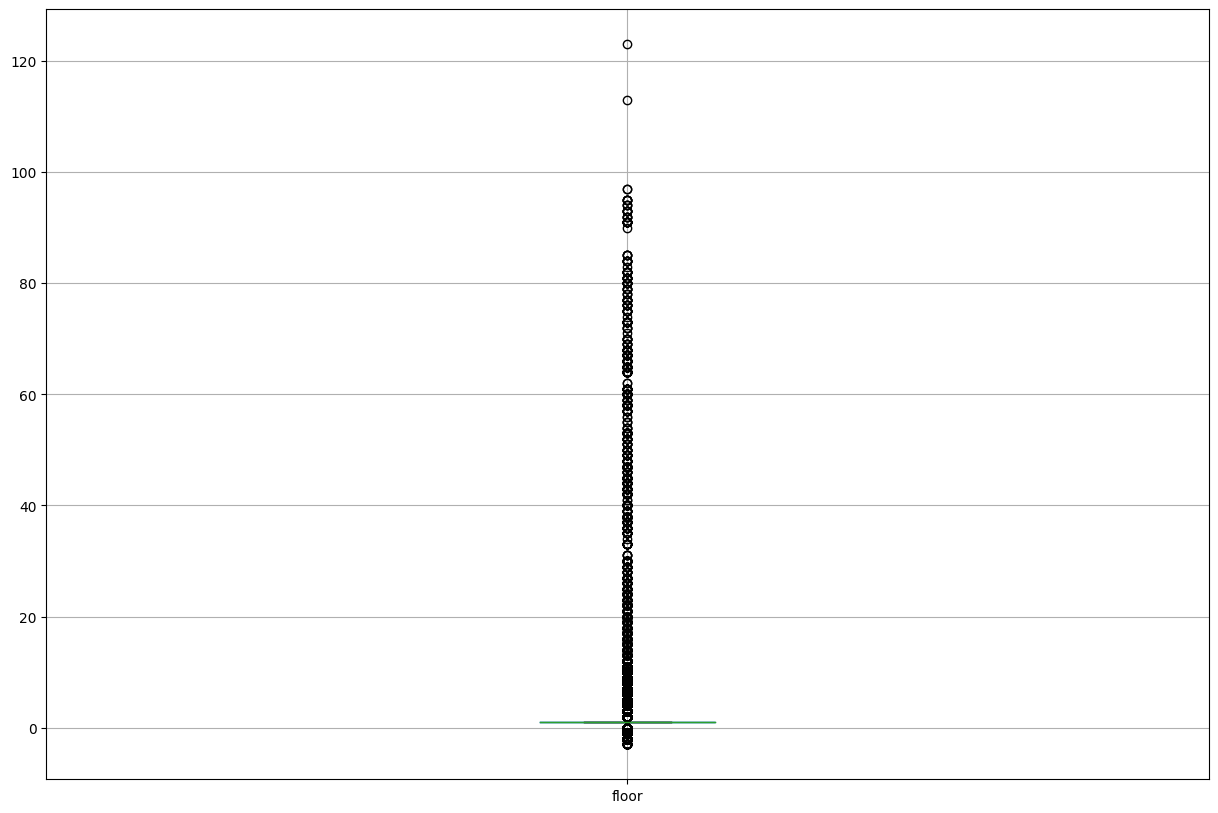

In [146]:
df.boxplot('floor', figsize=(15, 10))
plt.show()

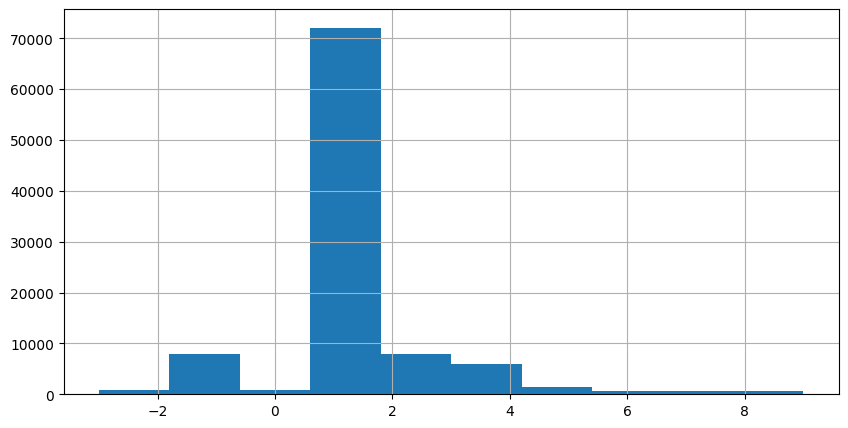

In [147]:
df[(df.floor < 10)].floor.hist()
plt.show()

In [148]:
pd.options.display.max_rows = 5000
cityFrequency = df.city.value_counts(normalize=True)
print(cityFrequency)

Москва                                                                                             0.203070
Санкт-Петербург                                                                                    0.067316
Краснодар                                                                                          0.047181
Екатеринбург                                                                                       0.030465
Новосибирск                                                                                        0.024047
Челябинск                                                                                          0.022361
Самара                                                                                             0.022140
Казань                                                                                             0.021824
Тюмень                                                                                             0.021126
Уфа                         

In [149]:
def isMediumCity(name):
  return cityFrequency[name] >= 0.005 and cityFrequency[name] < 0.015

def isSmallCity(name):
  return cityFrequency[name] >= 0.001 and cityFrequency[name] < 0.005 

def isLittleCity(name):
  return cityFrequency[name] >= 0.001 and cityFrequency[name] < 0.005 

df = df.assign(
  city_moskow=((df.city == "Москва")).astype(int),
  city_saint_petersburg=((df.city == "Санкт-Петербург")).astype(int),
  city_krasnodar=((df.city == "Краснодар")).astype(int),
  city_ekaterinburg=((df.city == "Екатеринбург")).astype(int),
  city_novosibirsk=((df.city == "Новосибирск")).astype(int),
  city_chelyabinsk=((df.city == "Челябинск")).astype(int),
  city_samara=((df.city == "Самара")).astype(int),
  city_kazan=((df.city == "Казань")).astype(int),
  city_tymen=((df.city == "Тюмень")).astype(int),
  city_ufa=((df.city == "Уфа")).astype(int),
  city_nino=((df.city == "Нижний Новгород")).astype(int),
  city_rod=((df.city == "Ростов-на-Дону")).astype(int),
  city_medium=((df.city.apply(isMediumCity))).astype(int),
  city_small=((df.city.apply(isSmallCity))).astype(int),
  city_little=((df.city.apply(isLittleCity))).astype(int)
)

In [150]:
def amenityDependency(in100m, in500m, in750m, in1000m):
  return in100m ** 1.5 + (in500m - in100m) ** 0.8 + (in750m - in500m) ** 0.6 + (in1000m - in750m) ** 0.4

In [151]:
df = df.assign(
  amenity=df.apply(lambda row: amenityDependency(row['osm_amenity_points_in_0.001'], 
                                                  row['osm_amenity_points_in_0.005'],
                                                  row['osm_amenity_points_in_0.0075'],
                                                  row['osm_amenity_points_in_0.01']), 
                    axis=1)
)

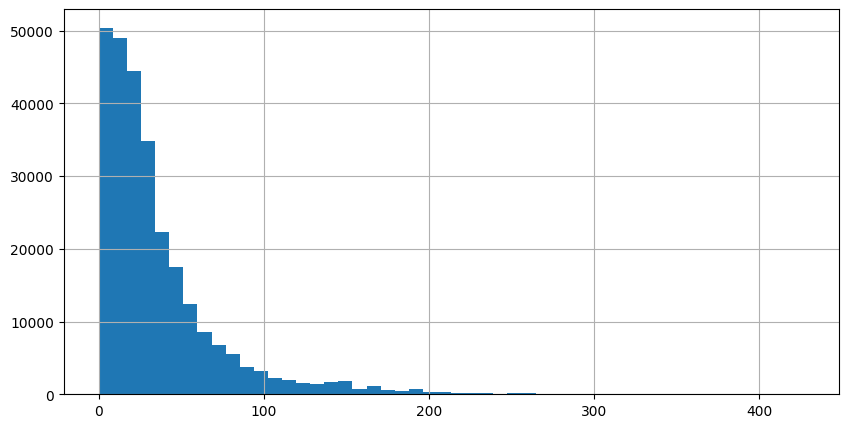

In [152]:
df.amenity.hist(bins=50)
plt.show()

In [153]:
from math import log1p
df = df.assign(
  amenity_ln=df.amenity.apply(log1p)
)

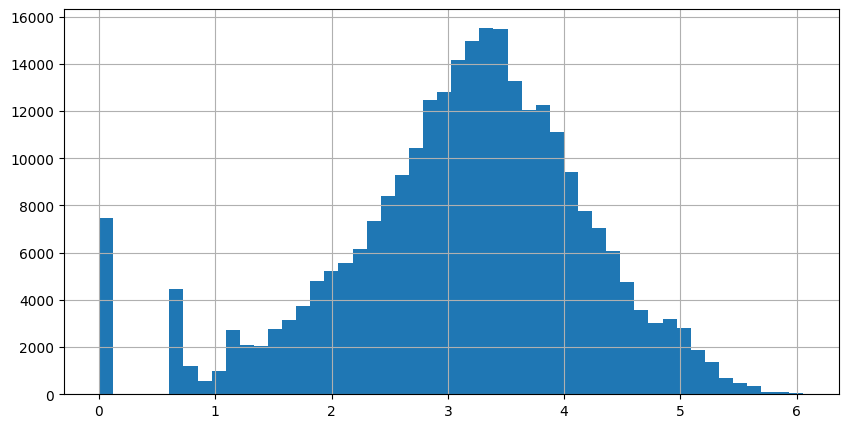

In [154]:
df.amenity_ln.hist(bins=50)
plt.show()

In [155]:
def medcouple(x):
  Q2 = x.quantile(q=0.5)
  dist = np.asarray([])
  for i in range(0, len(x)):
    for j in range(0, len(x)):
      if x[i] != x[j] and x[i] <= Q2 and x[j] < Q2:
        np.append(dist, (x[j] - Q2) - (Q2 - x[i])) / (x[j] - x[i])
  return dist.median()

In [156]:
median = df.amenity_ln.median()
print(median)
df = df.assign(
  amenity_ln_center=df.amenity_ln.apply(lambda x: x - median)
)

3.232528608117638


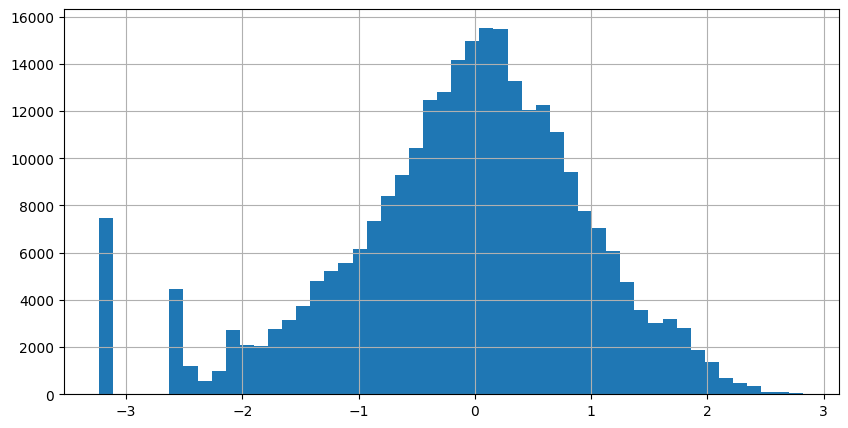

In [157]:
df.amenity_ln_center.hist(bins=50)
plt.show()

In [158]:
q25, q75 = df.amenity_ln_center.quantile(q=0.25), df.amenity_ln_center.quantile(q=0.75)
print("q25 =", q25, "\nq75 =", q75)

q25 = -0.6867438168067945 
q75 = 0.5941382782861746


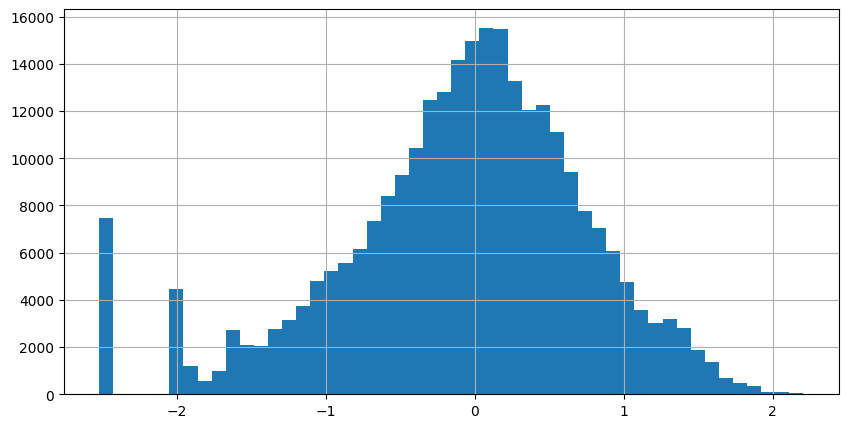

In [159]:
median = df.amenity_ln_center.median()
df = df.assign(
  amenity_ln_center_norm=df.amenity_ln_center.apply(lambda x: (x - median) / (q75 - q25))
)
df.amenity_ln_center_norm.hist(bins=50)
plt.show()

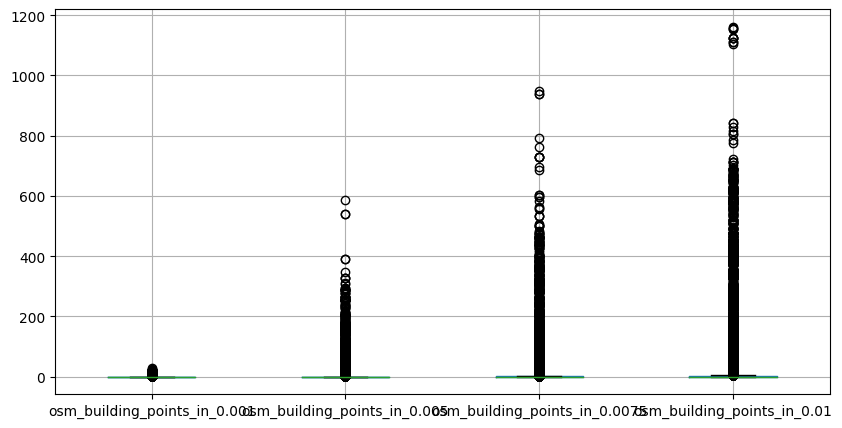

In [160]:
df.boxplot(['osm_building_points_in_0.001',
            'osm_building_points_in_0.005',
            'osm_building_points_in_0.0075',
            'osm_building_points_in_0.01'
])
plt.show()

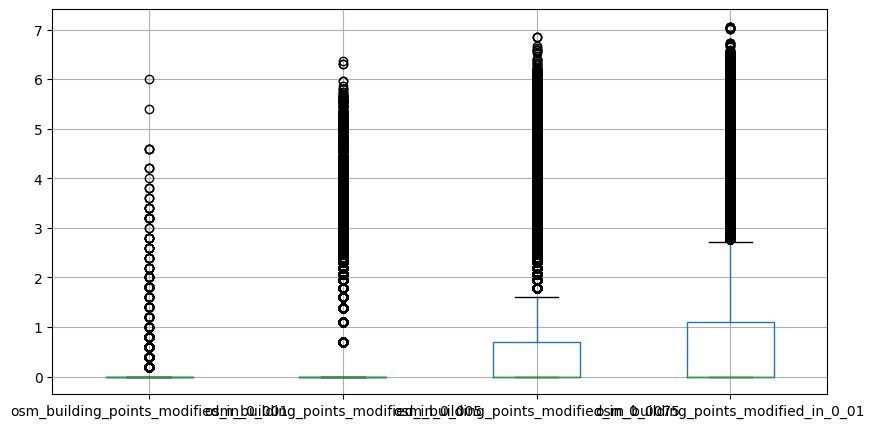

In [161]:
df = df.assign(
  osm_building_points_modified_in_0_001=df['osm_building_points_in_0.001'] / 5.0,
  osm_building_points_modified_in_0_005=df['osm_building_points_in_0.005'].apply(log1p),
  osm_building_points_modified_in_0_0075=df['osm_building_points_in_0.0075'].apply(log1p),
  osm_building_points_modified_in_0_01=df['osm_building_points_in_0.01'].apply(log1p),
)

df.boxplot(['osm_building_points_modified_in_0_001',
            'osm_building_points_modified_in_0_005',
            'osm_building_points_modified_in_0_0075',
            'osm_building_points_modified_in_0_01'
])
plt.show()

In [162]:
def buildingDependency(in100m, in500m, in750m, in1000m):
  return in100m  * 0.4 + (in500m - in100m) ** 0.6 + (in750m - in500m) ** 0.8 + (in1000m - in750m) ** 1.5

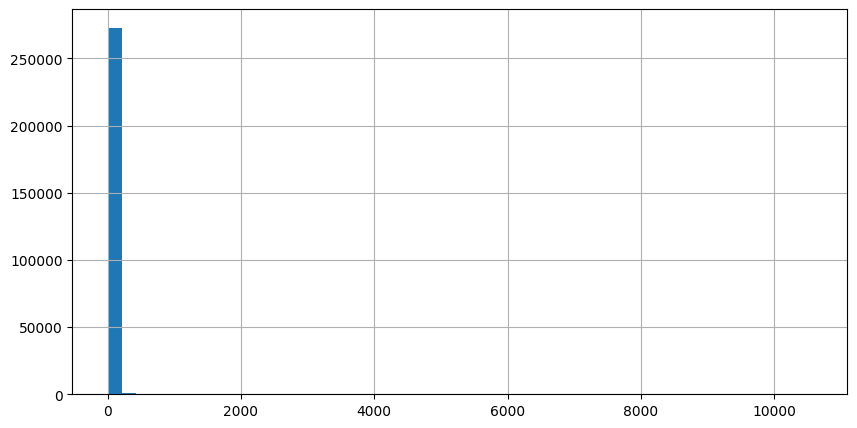

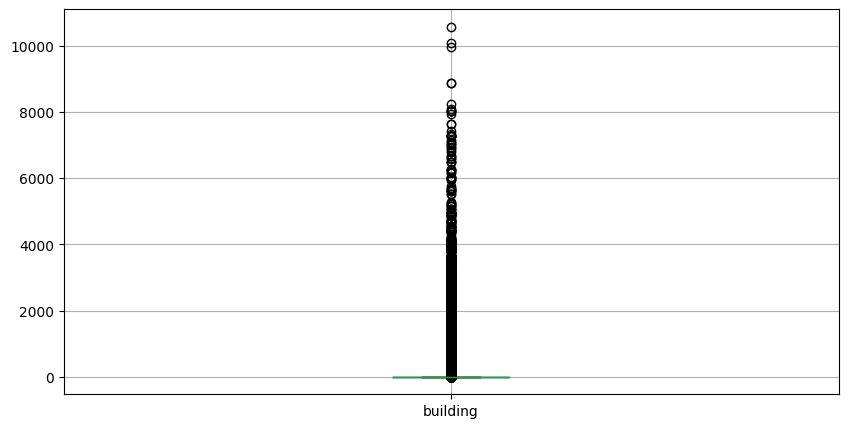

In [163]:
df = df.assign(
  building=df.apply(lambda row: buildingDependency(row['osm_building_points_in_0.001'],
                                                    row['osm_building_points_in_0.005'],
                                                    row['osm_building_points_in_0.0075'],
                                                    row['osm_building_points_in_0.01']), 
                    axis=1)
  )

df.building.hist(bins=50)
plt.show()

df.boxplot('building')
plt.show()

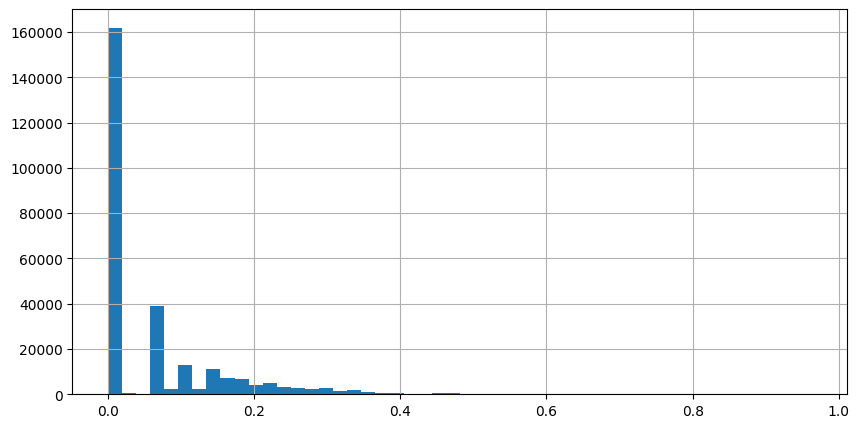

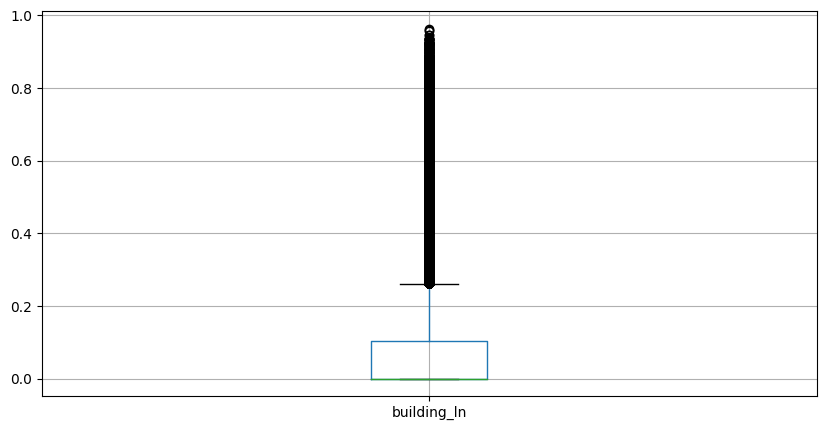

In [164]:
import math

df = df.assign(
  building_ln=df.building.apply(lambda x: math.log(x + 1, 15000))
)
df.building_ln.hist(bins=50)
plt.show()

df.boxplot('building_ln')
plt.show()

:(

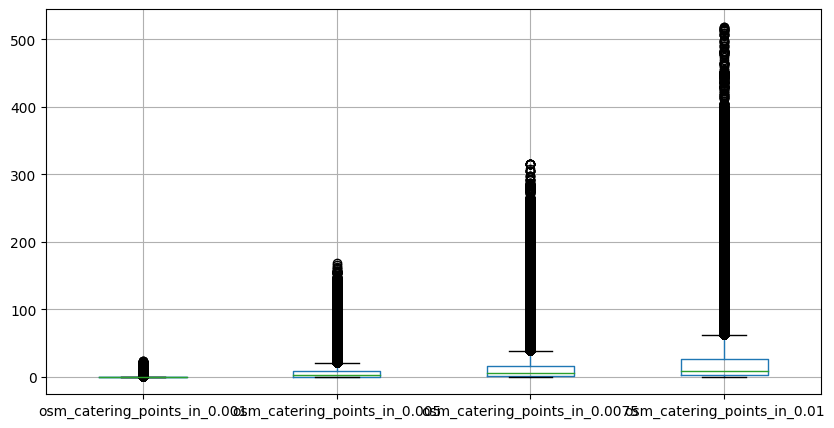

In [165]:
df.boxplot(['osm_catering_points_in_0.001',
            'osm_catering_points_in_0.005',
            'osm_catering_points_in_0.0075',
            'osm_catering_points_in_0.01'
])
plt.show()

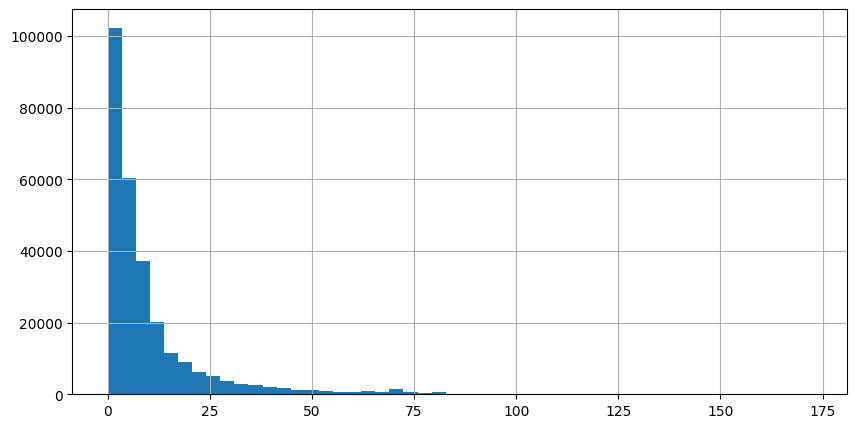

In [166]:
df = df.assign(
  catering=df.apply(lambda row: amenityDependency(row['osm_catering_points_in_0.001'], 
                                                  row['osm_catering_points_in_0.005'],
                                                  row['osm_catering_points_in_0.0075'],
                                                  row['osm_catering_points_in_0.01']), 
                    axis=1)
)
df.catering.hist(bins=50)
plt.show()

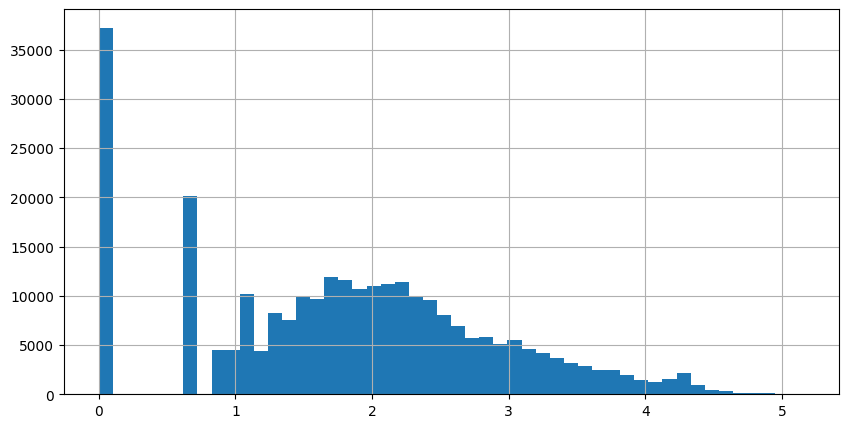

In [167]:
df = df.assign(
  catering_ln=df.catering.apply(log1p)
)
df.catering_ln.hist(bins=50)
plt.show()

1.8336717001210219


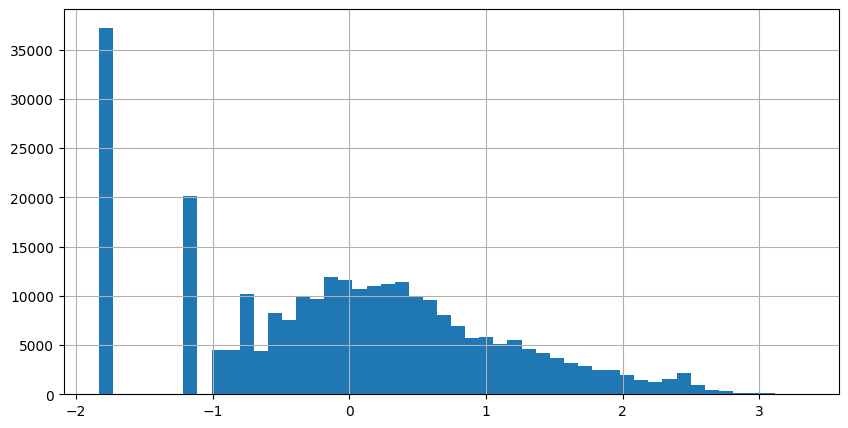

In [168]:
median = df.catering_ln.median()
print(median)
df = df.assign(
  catering_ln_center=df.catering_ln.apply(lambda x: x - median)
)
df.catering_ln_center.hist(bins=50)
plt.show()

q25 = -0.7350594114529123 
q75 = 0.6722777430595754


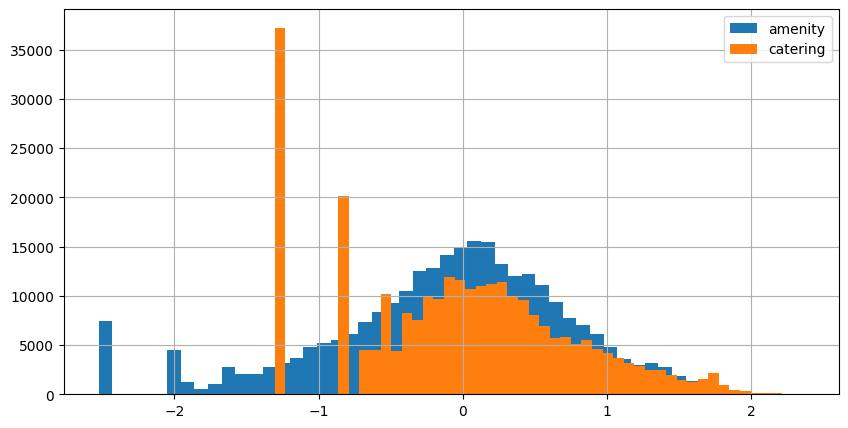

In [169]:
q25, q75 = df.catering_ln_center.quantile(q=0.25), df.catering_ln_center.quantile(q=0.75)
print("q25 =", q25, "\nq75 =", q75)

median = df.catering_ln_center.median()
df = df.assign(
  catering_ln_center_norm=df.catering_ln_center.apply(lambda x: (x - median) / (q75 - q25))
)
df.amenity_ln_center_norm.hist(bins=50, label='amenity')
df.catering_ln_center_norm.hist(bins=50, label='catering')
plt.legend()
plt.show()

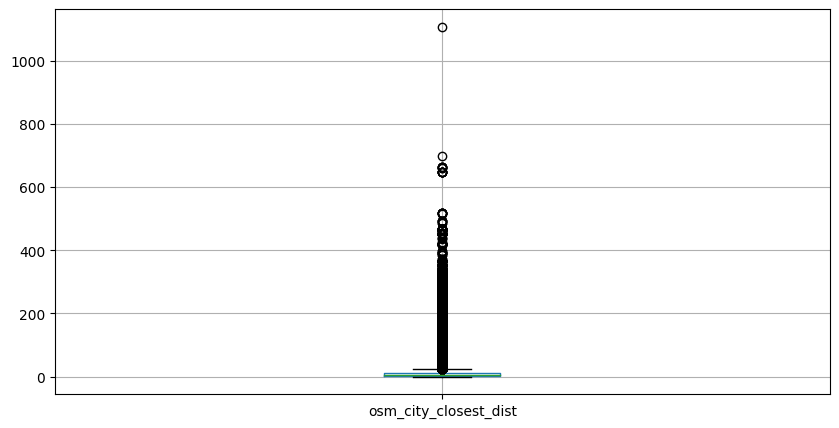

In [170]:
df.boxplot('osm_city_closest_dist')
plt.show()

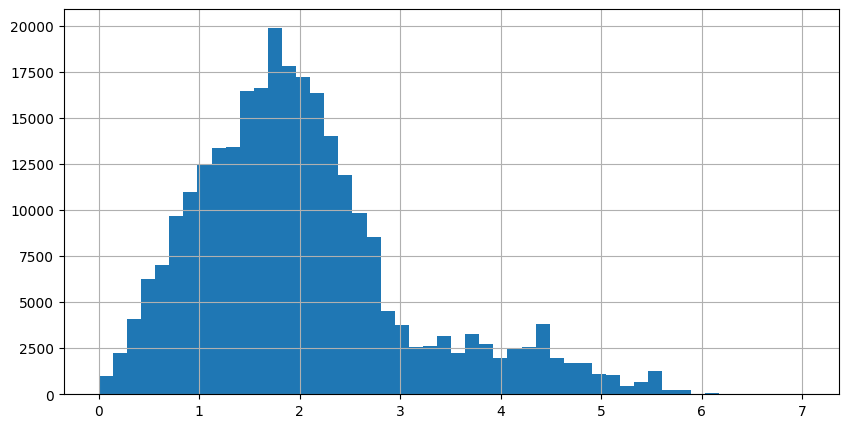

In [171]:
df = df.assign(
  city_closest_dist_ln=df.osm_city_closest_dist.apply(log1p)
)
df.city_closest_dist_ln.hist(bins=50)
plt.show()

1.8557692081607846


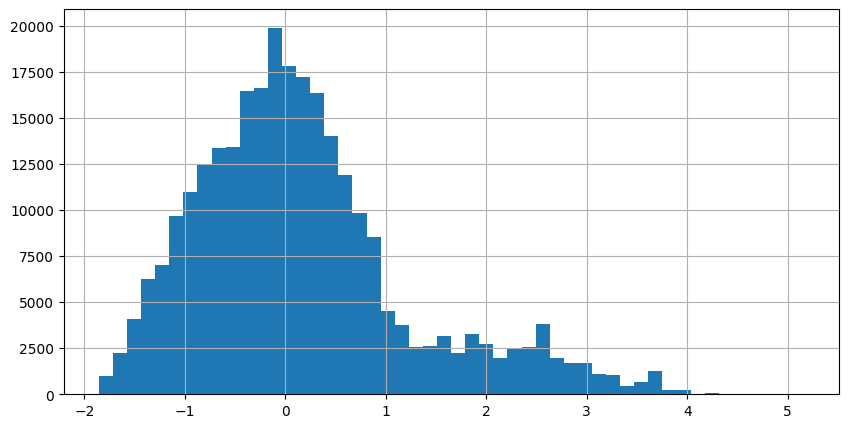

In [172]:
median = df.city_closest_dist_ln.median()
print(median)
df = df.assign(
  city_closest_dist_ln_center=df.city_closest_dist_ln.apply(lambda x: x - median)
)
df.city_closest_dist_ln_center.hist(bins=50)
plt.show()

q25 = -0.5751527337405891 
q75 = 0.6163196313745958


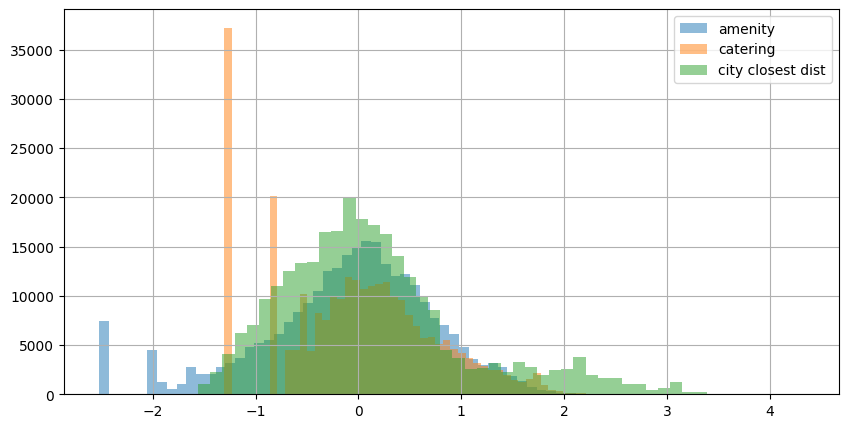

In [173]:
q25, q75 = df.city_closest_dist_ln_center.quantile(q=0.25), df.city_closest_dist_ln_center.quantile(q=0.75)
print("q25 =", q25, "\nq75 =", q75)

median = df.city_closest_dist_ln_center.median()
df = df.assign(
  city_closest_dist_ln_center_norm=df.city_closest_dist_ln_center.apply(lambda x: (x - median) / (q75 - q25))
)
df.amenity_ln_center_norm.hist(bins=50, label='amenity', alpha=0.5)
df.catering_ln_center_norm.hist(bins=50, label='catering', alpha=0.5)
df.city_closest_dist_ln_center_norm.hist(bins=50, label='city closest dist', alpha=0.5)
plt.legend()
plt.show()

In [174]:
nearestCityFrequency = df.osm_city_nearest_name.value_counts(normalize=True)
print(nearestCityFrequency)

def isMediumNearestCity(name):
  return nearestCityFrequency[name] >= 0.005 and nearestCityFrequency[name] <= 0.018

def isSmallNearestCity(name):
  return nearestCityFrequency[name] >= 0.001 and nearestCityFrequency[name] < 0.005 

def isLittleNearestCity(name):
  return nearestCityFrequency[name] >= 0.001 and nearestCityFrequency[name] < 0.005 

df = df.assign(
  nearest_city_moskow=((df.osm_city_nearest_name == "Москва")).astype(int),
  nearest_city_saint_petersburg=((df.osm_city_nearest_name == "Санкт-Петербург")).astype(int),
  nearest_city_krasnodar=((df.osm_city_nearest_name == "Краснодар")).astype(int),
  nearest_city_ekaterinburg=((df.osm_city_nearest_name == "Екатеринбург")).astype(int),
  nearest_city_novosibirsk=((df.osm_city_nearest_name == "Новосибирск")).astype(int),
  nearest_city_chelyabinsk=((df.osm_city_nearest_name == "Челябинск")).astype(int),
  nearest_city_samara=((df.osm_city_nearest_name == "Самара")).astype(int),
  nearest_city_kazan=((df.osm_city_nearest_name == "Казань")).astype(int),
  nearest_city_tymen=((df.osm_city_nearest_name == "Тюмень")).astype(int),
  nearest_city_podolsk=((df.osm_city_nearest_name == "Подольск")).astype(int),
  nearest_city_ufa=((df.osm_city_nearest_name == "Уфа")).astype(int),
  nearest_city_nino=((df.osm_city_nearest_name == "Нижний Новгород")).astype(int),
  nearest_city_rod=((df.osm_city_nearest_name == "Ростов-на-Дону")).astype(int),
  nearest_city_medium=((df.osm_city_nearest_name.apply(isMediumNearestCity))).astype(int),
  nearest_city_small=((df.osm_city_nearest_name.apply(isSmallNearestCity))).astype(int),
  nearest_city_little=((df.osm_city_nearest_name.apply(isLittleNearestCity))).astype(int)
)

Москва               0.133825
Санкт-Петербург      0.067341
Краснодар            0.053070
Екатеринбург         0.033771
Челябинск            0.025507
Новосибирск          0.024028
Самара               0.023709
Казань               0.023622
Тюмень               0.023069
Подольск             0.022172
Нижний Новгород      0.019539
Уфа                  0.019328
Ростов-на-Дону       0.018692
Пермь                0.016949
Воронеж              0.016357
Люберцы              0.016004
Новороссийск         0.014984
Красноярск           0.014370
Химки                0.014126
Калининград          0.012946
Ставрополь           0.011762
Саратов              0.011152
Одинцово             0.010999
Долгопрудный         0.010294
Сочи                 0.009644
Волгоград            0.009437
Красногорск          0.009263
Омск                 0.009019
Иркутск              0.008936
Мытищи               0.008874
Барнаул              0.008747
Ижевск               0.007933
Пенза                0.007185
Кемерово  

In [175]:
# mean, std = df.osm_city_nearest_population.apply(log1p).mean(), df.osm_city_nearest_population.apply(log1p).std()
# print(mean, std)
# df.osm_city_nearest_population.apply(lambda x: ((x + mean) / std)).hist(bins=50)
# plt.show()

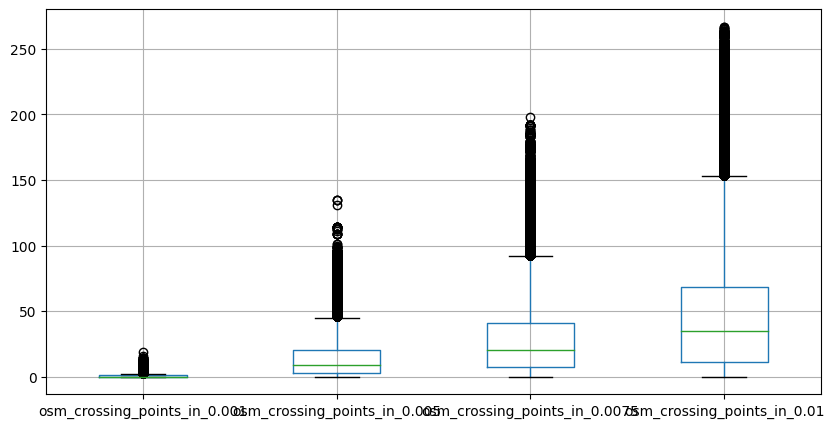

In [176]:
df.boxplot(['osm_crossing_points_in_0.001',
            'osm_crossing_points_in_0.005',
            'osm_crossing_points_in_0.0075',
            'osm_crossing_points_in_0.01'
])
plt.show()

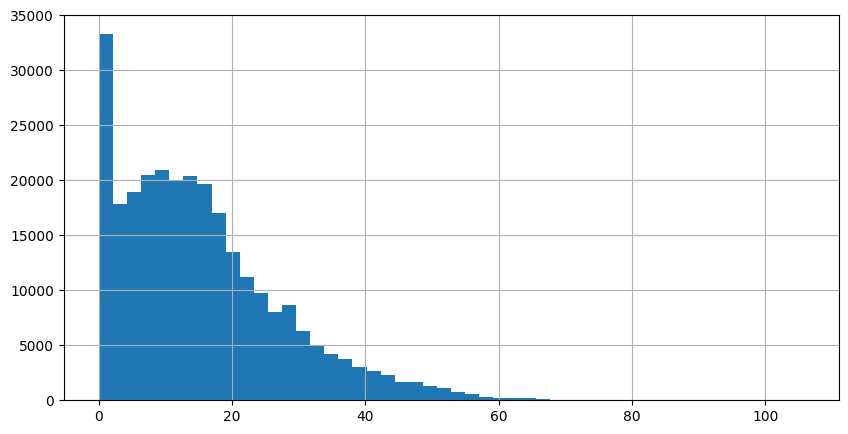

In [177]:
df = df.assign(
  crossing=df.apply(lambda row: amenityDependency(row['osm_crossing_points_in_0.001'], 
                                                    row['osm_crossing_points_in_0.005'],
                                                    row['osm_crossing_points_in_0.0075'],
                                                    row['osm_crossing_points_in_0.01']), 
                    axis=1)
)
df.crossing.hist(bins=50)
plt.show()

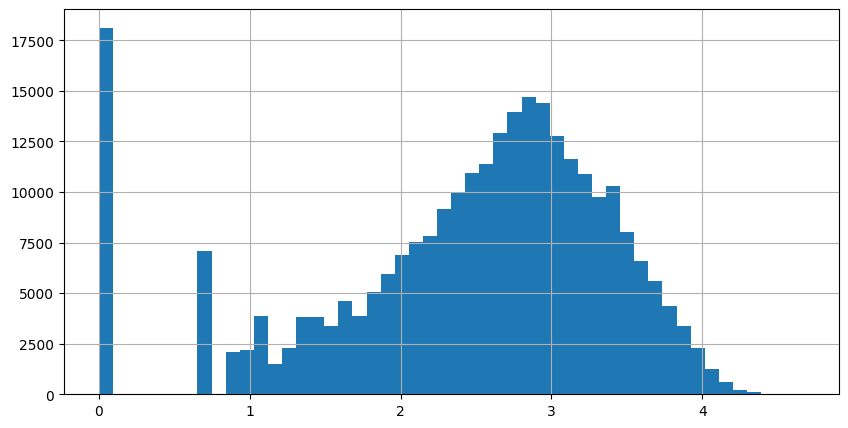

2.6617110680957854


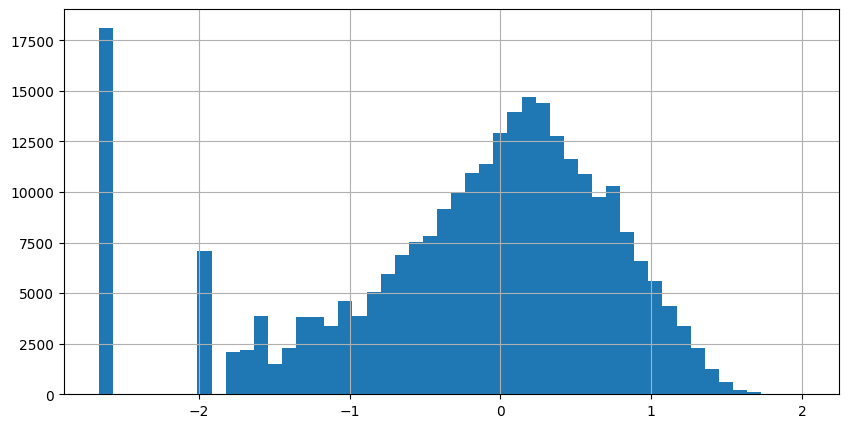

q25 = -0.6838105730995612 
q75 = 0.4684451199657451


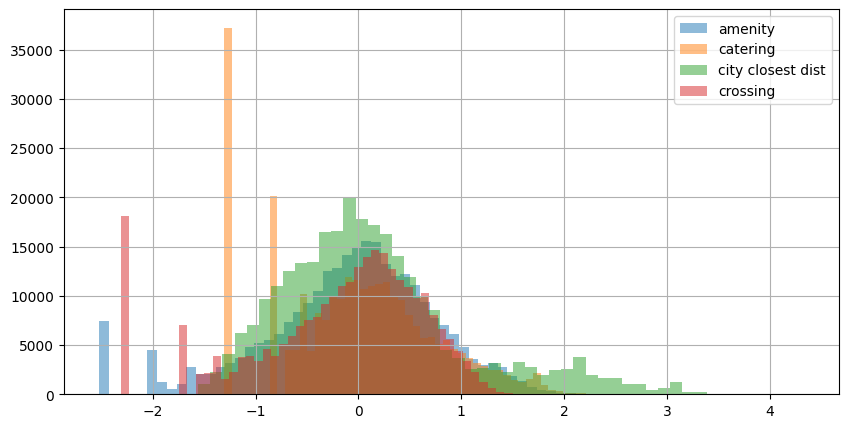

In [178]:
df = df.assign(
  crossing_ln=df.crossing.apply(log1p)
)
df.crossing_ln.hist(bins=50)
plt.show()

median = df.crossing_ln.median()
print(median)
df = df.assign(
  crossing_ln_center=df.crossing_ln.apply(lambda x: x - median)
)
df.crossing_ln_center.hist(bins=50)
plt.show()

q25, q75 = df.crossing_ln_center.quantile(q=0.25), df.crossing_ln_center.quantile(q=0.75)
print("q25 =", q25, "\nq75 =", q75)

median = df.crossing_ln_center.median()
df = df.assign(
  crossing_ln_center_norm=df.crossing_ln_center.apply(lambda x: (x - median) / (q75 - q25))
)
df.amenity_ln_center_norm.hist(bins=50, label='amenity', alpha=0.5)
df.catering_ln_center_norm.hist(bins=50, label='catering', alpha=0.5)
df.city_closest_dist_ln_center_norm.hist(bins=50, label='city closest dist', alpha=0.5)
df.crossing_ln_center_norm.hist(bins=50, label='crossing', alpha=0.5)
plt.legend()
plt.show()

culture_points kinda :(

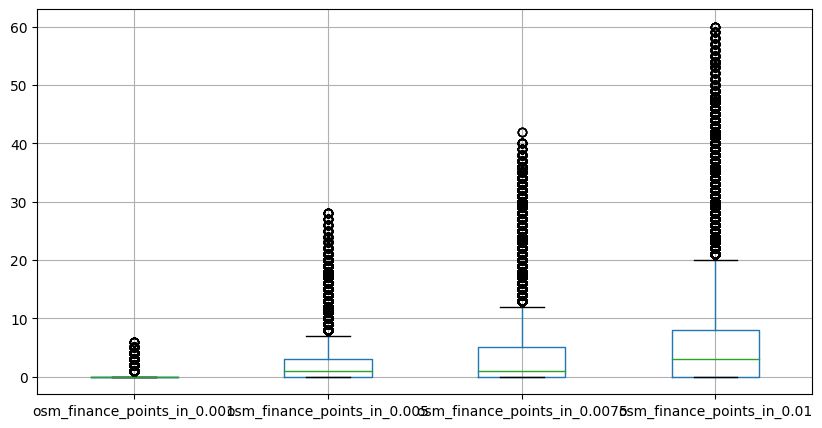

In [179]:
df.boxplot(['osm_finance_points_in_0.001',
            'osm_finance_points_in_0.005',
            'osm_finance_points_in_0.0075',
            'osm_finance_points_in_0.01'
])
plt.show()

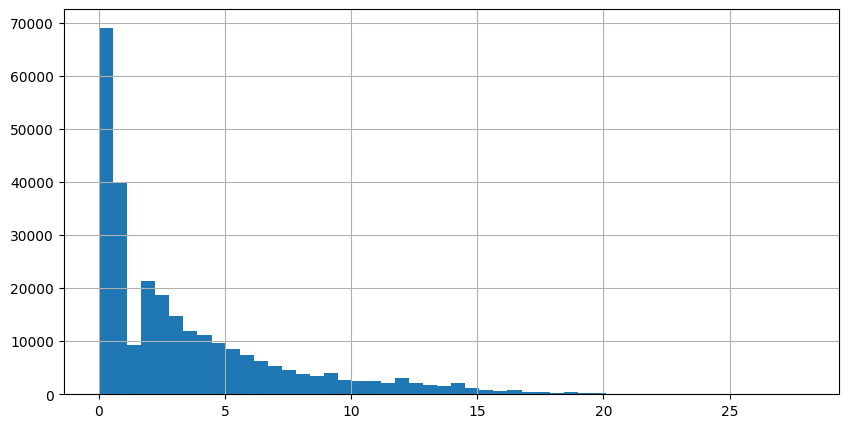

In [180]:
df = df.assign(
  finance=df.apply(lambda row: amenityDependency(row['osm_finance_points_in_0.001'], 
                                                  row['osm_finance_points_in_0.005'],
                                                  row['osm_finance_points_in_0.0075'],
                                                  row['osm_finance_points_in_0.01']), 
                    axis=1)
)
df.finance.hist(bins=50)
plt.show()

finance_points :(

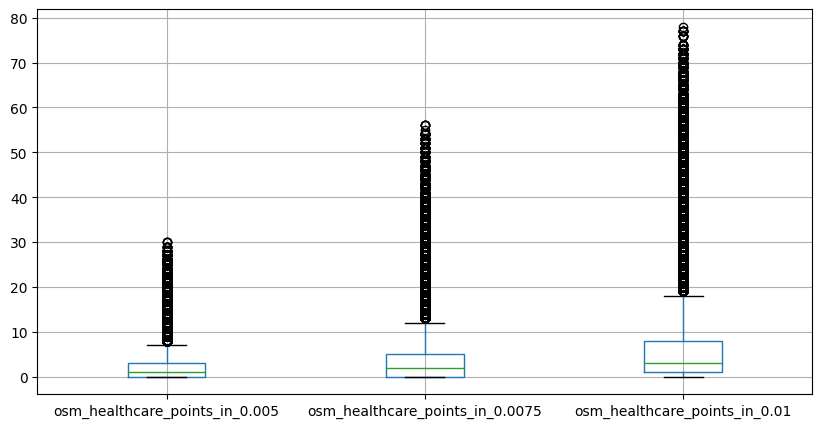

In [181]:
df.boxplot(['osm_healthcare_points_in_0.005',
            'osm_healthcare_points_in_0.0075',
            'osm_healthcare_points_in_0.01'
])
plt.show()

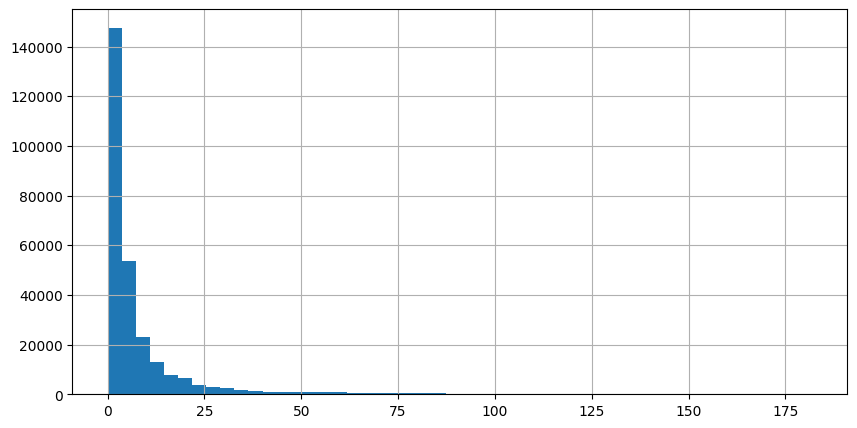

In [182]:
df = df.assign(
  healthcare=df.apply(lambda row: amenityDependency(row['osm_healthcare_points_in_0.005'],
                                                    row['osm_healthcare_points_in_0.0075'],
                                                    row['osm_healthcare_points_in_0.01'], 
                                                    row['osm_healthcare_points_in_0.01']), 
                    axis=1)
)
df.healthcare.hist(bins=50)
plt.show()

healthcare :(

historic :(

hotels :(

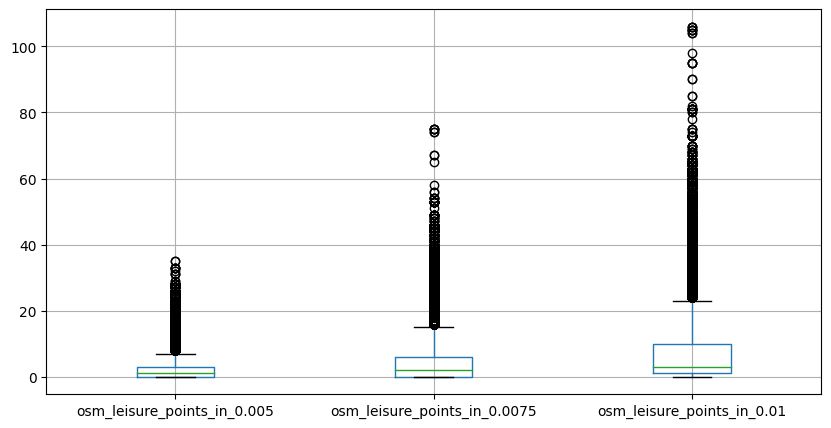

In [183]:
# osm_leisure_points
df.boxplot(['osm_leisure_points_in_0.005',
            'osm_leisure_points_in_0.0075',
            'osm_leisure_points_in_0.01'
])
plt.show()

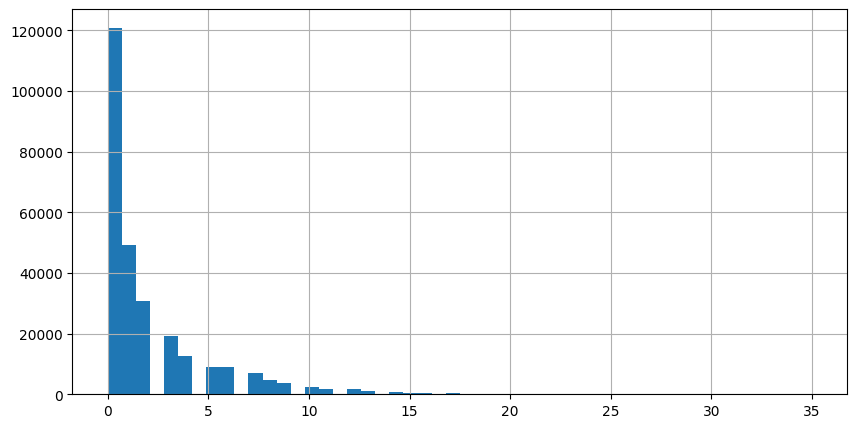

In [184]:
def leisureDependency(in500m, in750m, in1000m):
  return in500m 

df = df.assign(
  leisure=df.apply(lambda row: leisureDependency(row['osm_leisure_points_in_0.005'],
                                                  row['osm_leisure_points_in_0.0075'],
                                                  row['osm_leisure_points_in_0.01']), 
                    axis=1)
)
df.leisure.hist(bins=50)
plt.show()

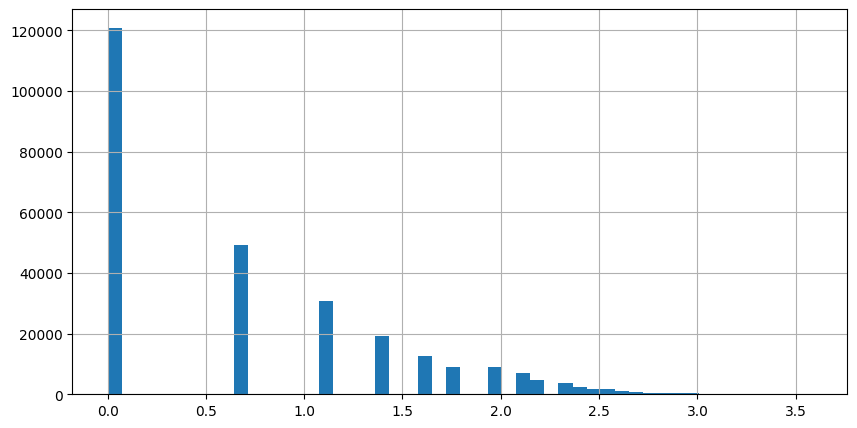

0.6931471805599453


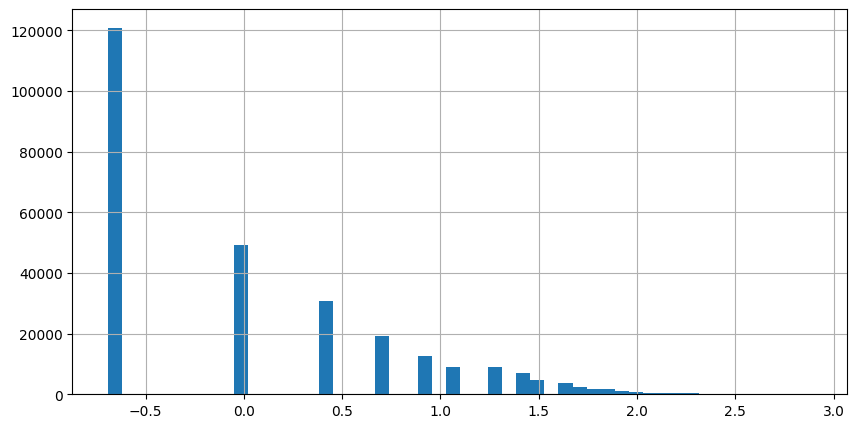

q25 = -0.6931471805599453 
q75 = 0.6931471805599453


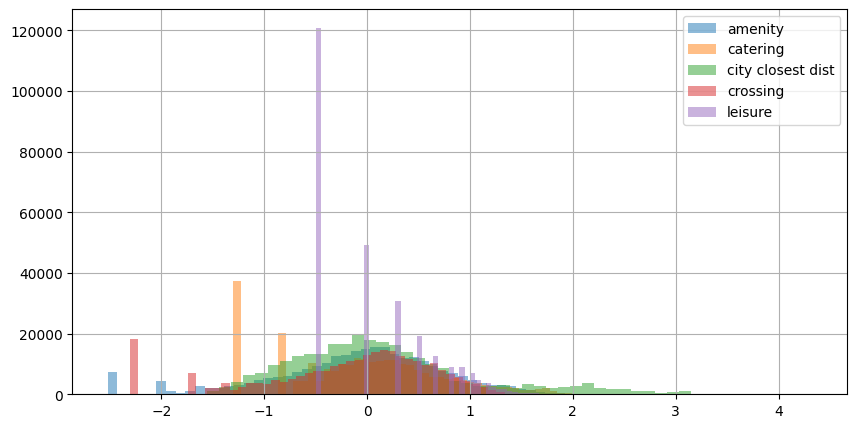

In [185]:
df = df.assign(
  leisure_ln=df.leisure.apply(log1p)
)
df.leisure_ln.hist(bins=50)
plt.show()

median = df.leisure_ln.median()
print(median)
df = df.assign(
  leisure_ln_center=df.leisure_ln.apply(lambda x: x - median)
)
df.leisure_ln_center.hist(bins=50)
plt.show()

q25, q75 = df.leisure_ln_center.quantile(q=0.25), df.leisure_ln_center.quantile(q=0.75)
print("q25 =", q25, "\nq75 =", q75)

median = df.leisure_ln_center.median()
df = df.assign(
  leisure_ln_center_norm=df.leisure_ln_center.apply(lambda x: (x - median) / (q75 - q25))
)
df.amenity_ln_center_norm.hist(bins=50, label='amenity', alpha=0.5)
df.catering_ln_center_norm.hist(bins=50, label='catering', alpha=0.5)
df.city_closest_dist_ln_center_norm.hist(bins=50, label='city closest dist', alpha=0.5)
df.crossing_ln_center_norm.hist(bins=50, label='crossing', alpha=0.5)
# df.shops_ln_center_norm.hist(bins=50, label='shops', alpha=0.5)
df.leisure_ln_center_norm.hist(bins=50, label='leisure', alpha=0.5)
plt.legend()
plt.show()

leisure :(

offices :(

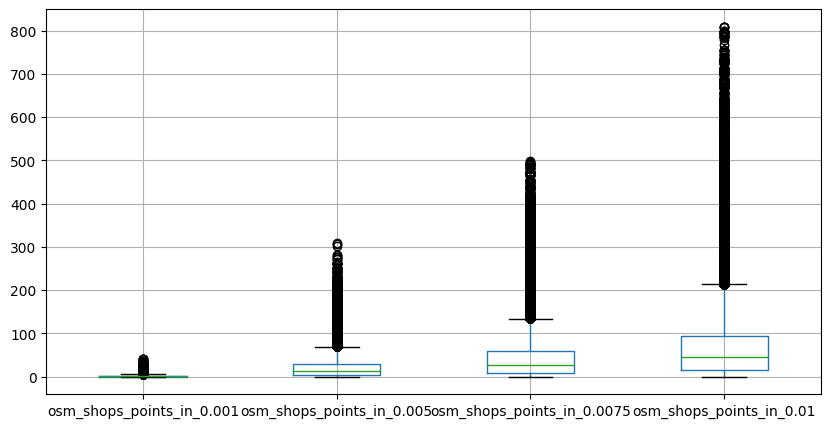

In [186]:
df.boxplot(['osm_shops_points_in_0.001',
            'osm_shops_points_in_0.005',
            'osm_shops_points_in_0.0075',
            'osm_shops_points_in_0.01'
])
plt.show()

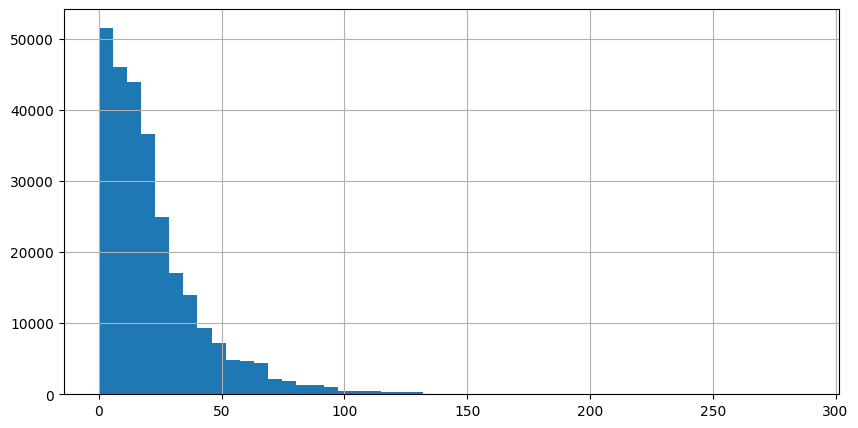

In [187]:
df = df.assign(
  shops=df.apply(lambda row: amenityDependency(row['osm_shops_points_in_0.001'], 
                                                row['osm_shops_points_in_0.005'],
                                                row['osm_shops_points_in_0.0075'],
                                                row['osm_shops_points_in_0.01']), 
                    axis=1)
)
df.shops.hist(bins=50)
plt.show()

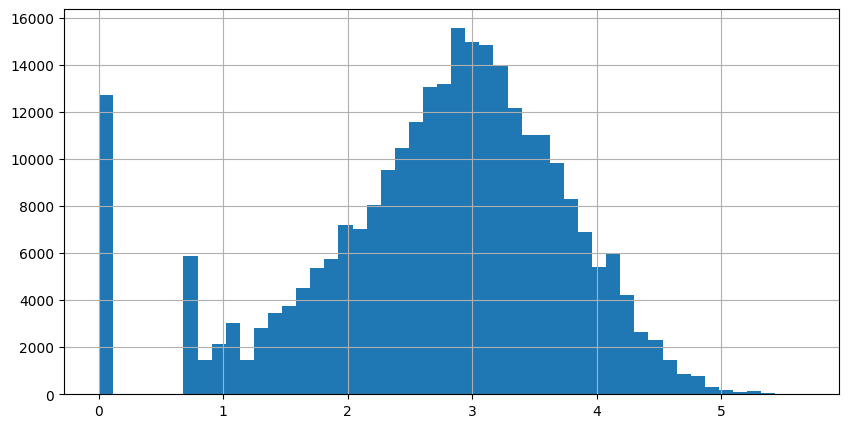

2.87123572866897


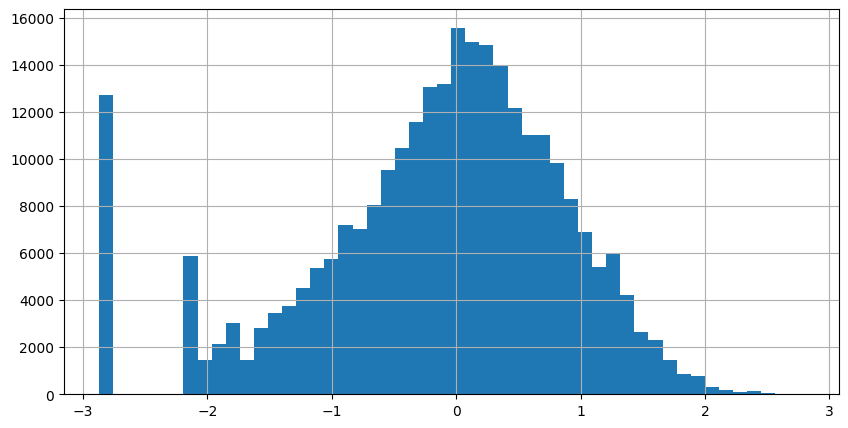

q25 = -0.687353542990794 
q75 = 0.5518612918124632


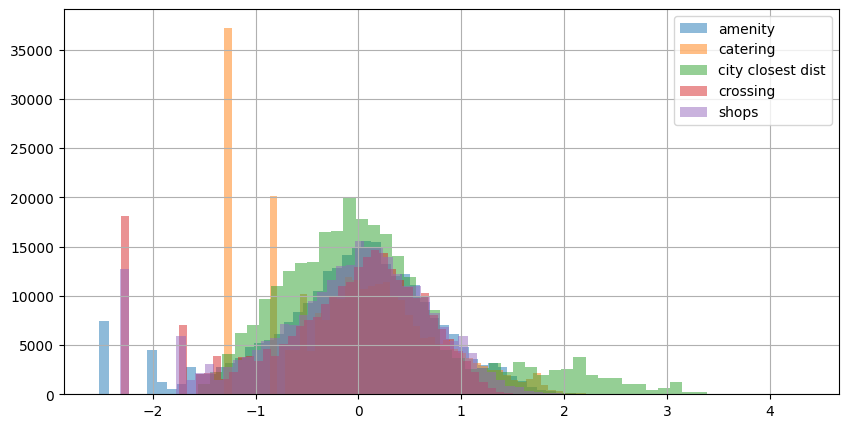

In [188]:
df = df.assign(
  shops_ln=df.shops.apply(log1p)
)
df.shops_ln.hist(bins=50)
plt.show()

median = df.shops_ln.median()
print(median)
df = df.assign(
  shops_ln_center=df.shops_ln.apply(lambda x: x - median)
)
df.shops_ln_center.hist(bins=50)
plt.show()

q25, q75 = df.shops_ln_center.quantile(q=0.25), df.shops_ln_center.quantile(q=0.75)
print("q25 =", q25, "\nq75 =", q75)

median = df.shops_ln_center.median()
df = df.assign(
  shops_ln_center_norm=df.shops_ln_center.apply(lambda x: (x - median) / (q75 - q25))
)
df.amenity_ln_center_norm.hist(bins=50, label='amenity', alpha=0.5)
df.catering_ln_center_norm.hist(bins=50, label='catering', alpha=0.5)
df.city_closest_dist_ln_center_norm.hist(bins=50, label='city closest dist', alpha=0.5)
df.crossing_ln_center_norm.hist(bins=50, label='crossing', alpha=0.5)
df.shops_ln_center_norm.hist(bins=50, label='shops', alpha=0.5)
plt.legend()
plt.show()

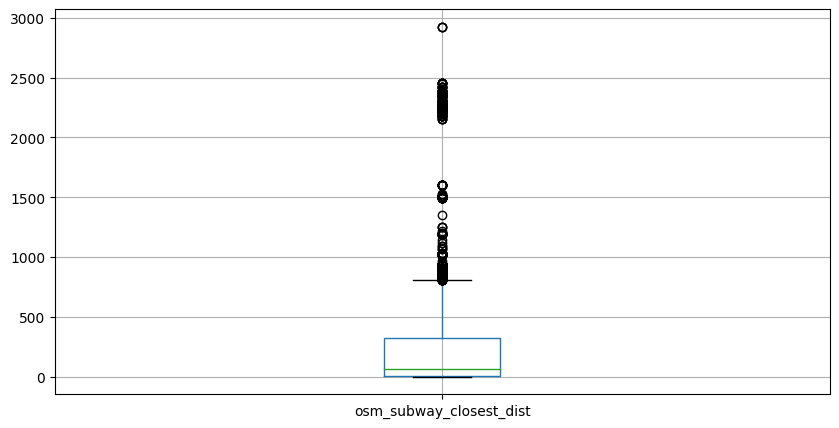

In [189]:
df.boxplot('osm_subway_closest_dist')
plt.show()

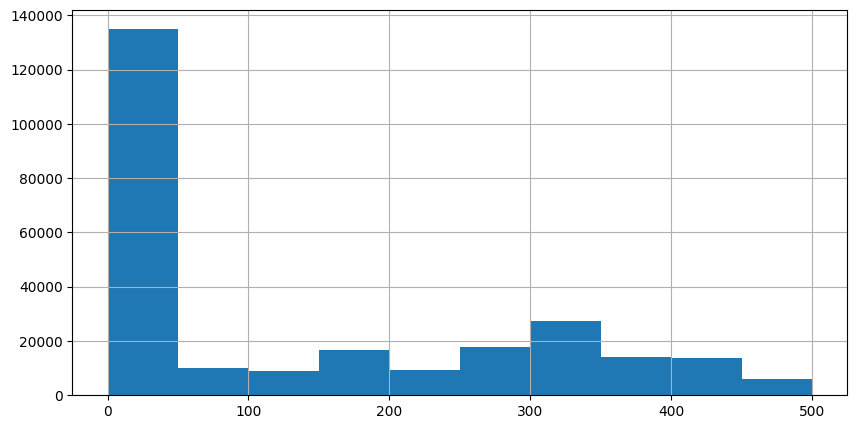

In [190]:
df[df.osm_subway_closest_dist < 500].osm_subway_closest_dist.hist()
plt.show()

In [191]:
df = df.assign(
  subway_in_100m=((df.osm_subway_closest_dist <= 100)).astype(int),
  subway_in_500m=((100 < df.osm_subway_closest_dist) & (df.osm_subway_closest_dist <= 500)).astype(int),
  subway_in_1500m=((500 < df.osm_subway_closest_dist) & (df.osm_subway_closest_dist <= 1500)).astype(int),
  subway_far_away=((1500 < df.osm_subway_closest_dist)).astype(int),
)

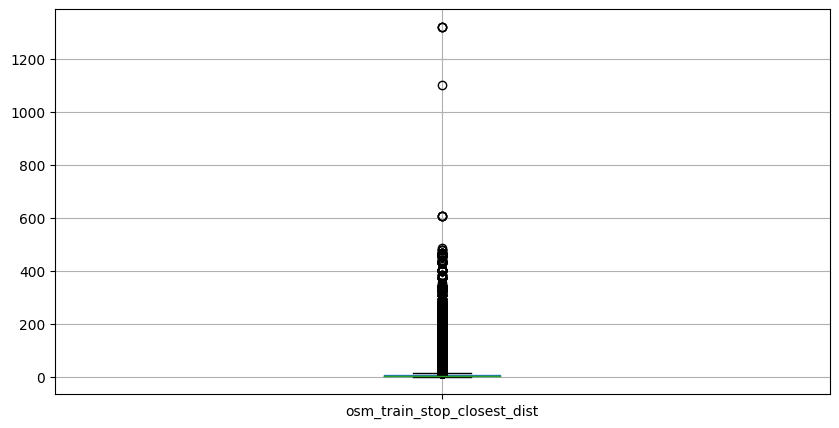

In [192]:
df.boxplot('osm_train_stop_closest_dist')
plt.show()

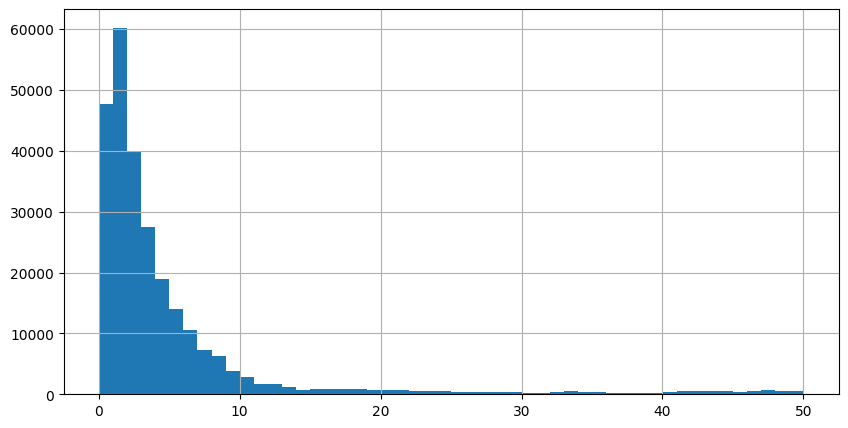

5.120800021084878


In [193]:
df[df.osm_train_stop_closest_dist < 50].osm_train_stop_closest_dist.hist(bins=50)
plt.show()
print(df[df.osm_train_stop_closest_dist < 50].osm_train_stop_closest_dist.quantile(q=0.75))

In [194]:
df = df.assign(
  train_stop_in_1_5=((df.osm_train_stop_closest_dist <= 1.5)).astype(int),
  train_stop_in_2_55=((1.5 < df.osm_train_stop_closest_dist) & (df.osm_train_stop_closest_dist <= 2.55)).astype(int),
  train_stop_in_5_2=((2.55 < df.osm_train_stop_closest_dist) & (df.osm_train_stop_closest_dist <= 5_2)).astype(int),
  train_stop_far_away=((5.2 < df.osm_train_stop_closest_dist)).astype(int)
)

train_stop_points skip

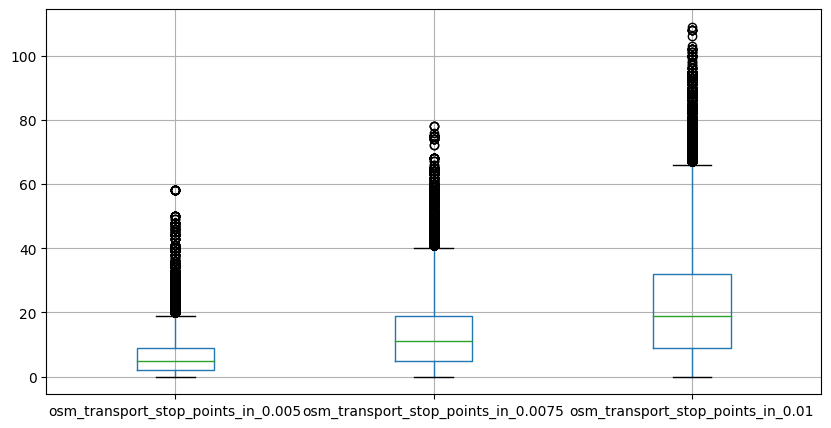

In [195]:
df.boxplot(['osm_transport_stop_points_in_0.005',
            'osm_transport_stop_points_in_0.0075',
            'osm_transport_stop_points_in_0.01'
])
plt.show()

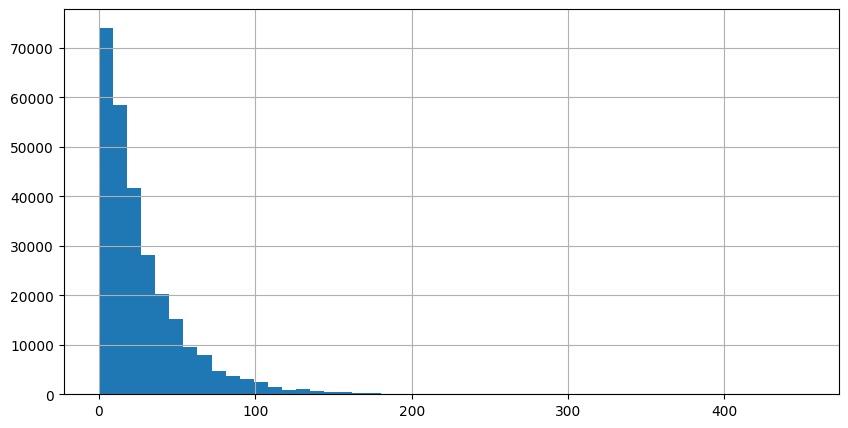

In [196]:
df = df.assign(
  transport_stop=df.apply(lambda row: amenityDependency(row['osm_transport_stop_points_in_0.005'],
                                                        row['osm_transport_stop_points_in_0.0075'],
                                                        row['osm_transport_stop_points_in_0.01'],
                                                        row['osm_transport_stop_points_in_0.01']), 
                    axis=1)
)
df.transport_stop.hist(bins=50)
plt.show()

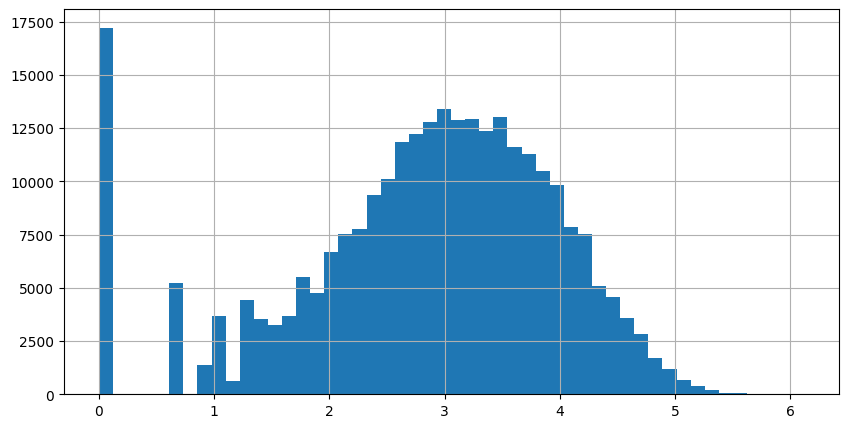

2.988394031036498


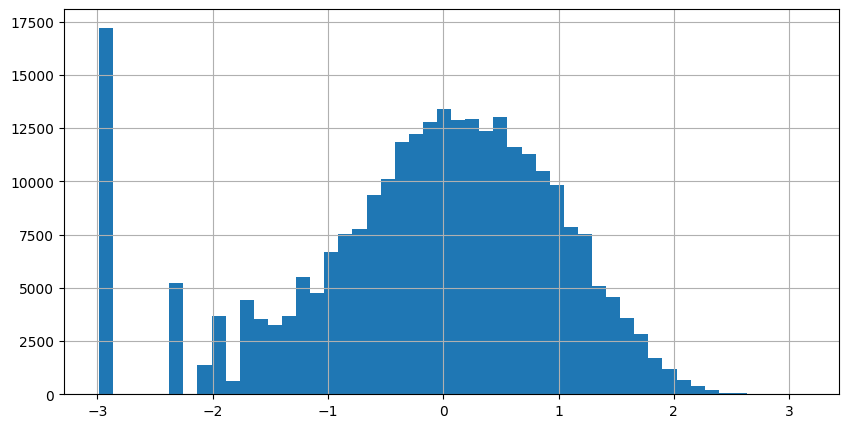

q25 = -0.7720168831610725 
q75 = 0.6637193402933375


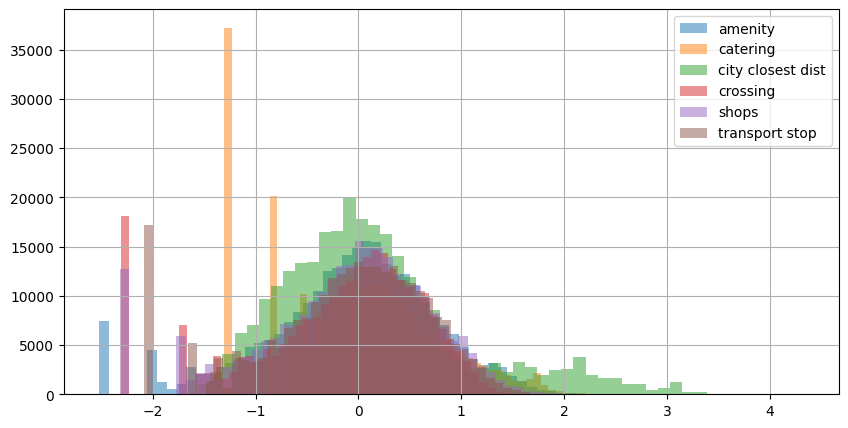

In [197]:
df = df.assign(
  transport_stop_ln=df.transport_stop.apply(log1p)
)
df.transport_stop_ln.hist(bins=50)
plt.show()

median = df.transport_stop_ln.median()
print(median)
df = df.assign(
  transport_stop_ln_center=df.transport_stop_ln.apply(lambda x: x - median)
)
df.transport_stop_ln_center.hist(bins=50)
plt.show()

q25, q75 = df.transport_stop_ln_center.quantile(q=0.25), df.transport_stop_ln_center.quantile(q=0.75)
print("q25 =", q25, "\nq75 =", q75)

median = df.transport_stop_ln_center.median()
df = df.assign(
  transport_stop_ln_center_norm=df.transport_stop_ln_center.apply(lambda x: (x - median) / (q75 - q25))
)
df.amenity_ln_center_norm.hist(bins=50, label='amenity', alpha=0.5)
df.catering_ln_center_norm.hist(bins=50, label='catering', alpha=0.5)
df.city_closest_dist_ln_center_norm.hist(bins=50, label='city closest dist', alpha=0.5)
df.crossing_ln_center_norm.hist(bins=50, label='crossing', alpha=0.5)
df.shops_ln_center_norm.hist(bins=50, label='shops', alpha=0.5)
df.transport_stop_ln_center_norm.hist(bins=50, label='transport stop', alpha=0.5)
plt.legend()
plt.show()

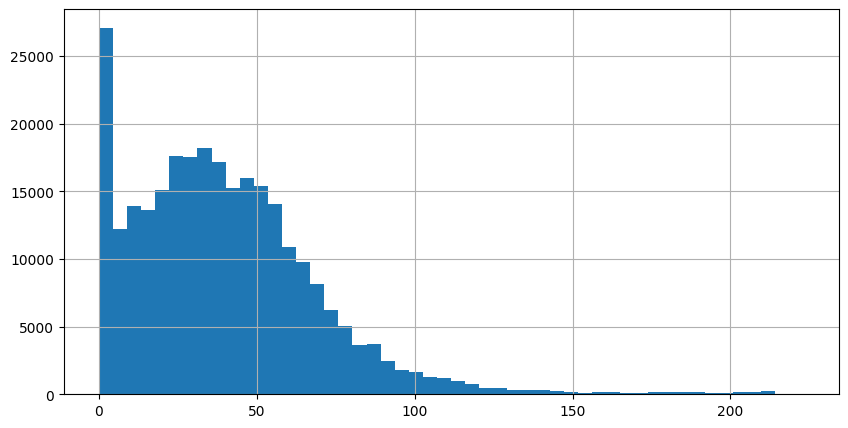

In [198]:
df = df.assign(
  reform_count_of_houses=df.apply(lambda row: row.reform_count_of_houses_500 * 0.4 + (row.reform_count_of_houses_1000 -
                                                                                      row.reform_count_of_houses_500) ** 0.8, axis=1)
)
df.reform_count_of_houses.hist(bins=50)
plt.show()

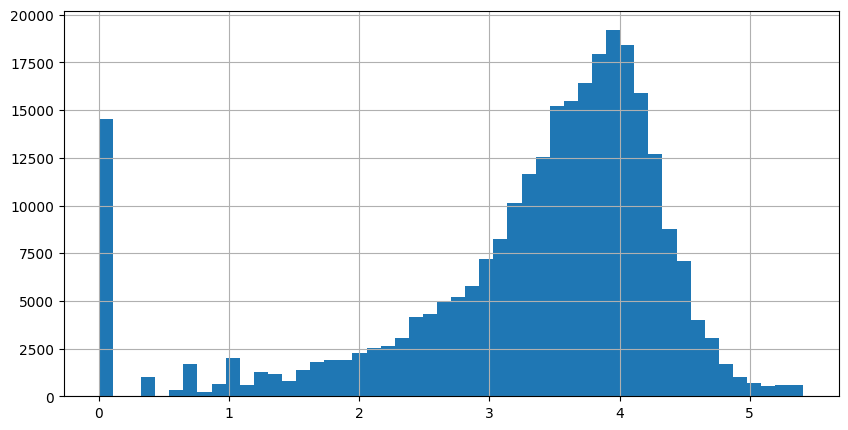

3.618177975329147


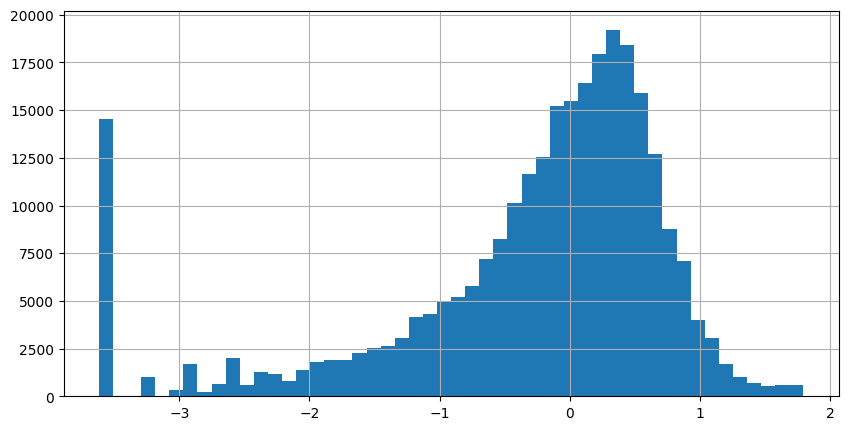

q25 = -0.653888056849818 
q75 = 0.4207407990876333


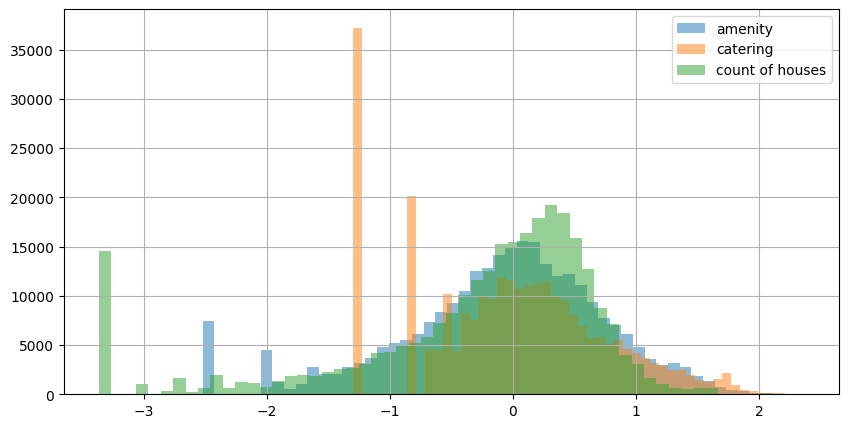

In [199]:
df = df.assign(
  reform_count_of_houses_ln=df.reform_count_of_houses.apply(log1p)
)
df.reform_count_of_houses_ln.hist(bins=50)
plt.show()

median = df.reform_count_of_houses_ln.median()
print(median)
df = df.assign(
  reform_count_of_houses_ln_center=df.reform_count_of_houses_ln.apply(lambda x: x - median)
)
df.reform_count_of_houses_ln_center.hist(bins=50)
plt.show()

q25, q75 = df.reform_count_of_houses_ln_center.quantile(q=0.25), df.reform_count_of_houses_ln_center.quantile(q=0.75)
print("q25 =", q25, "\nq75 =", q75)

median = df.reform_count_of_houses_ln_center.median()
df = df.assign(
  reform_count_of_houses_ln_center_norm=df.reform_count_of_houses_ln_center.apply(lambda x:  (x - median) / (q75 - q25))
)
df.amenity_ln_center_norm.hist(bins=50, label='amenity', alpha=0.5)
df.catering_ln_center_norm.hist(bins=50, label='catering', alpha=0.5)
df.reform_count_of_houses_ln_center_norm.hist(bins=50, label='count of houses', alpha=0.5)
plt.legend()
plt.show()

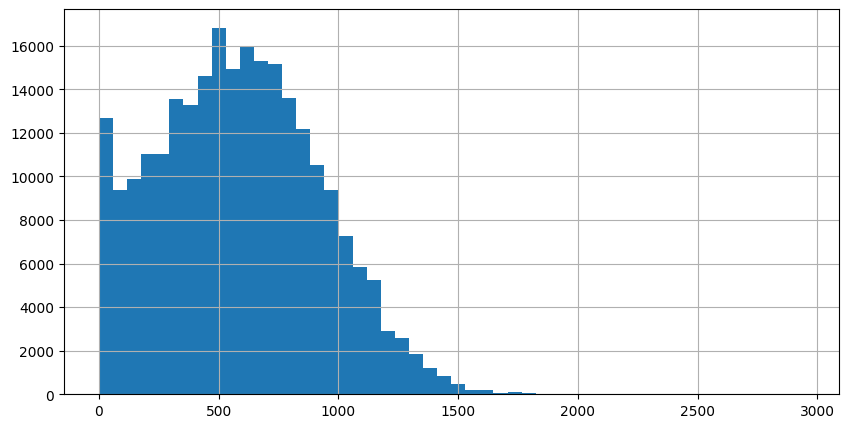

In [200]:
df = df.assign(
  reform_house_population=df.apply(lambda row: row.reform_house_population_500 * 0.4 + (row.reform_house_population_1000 -
                                                                                        row.reform_house_population_500) ** 0.8, axis=1)
)
df.reform_house_population.hist(bins=50)
plt.show()

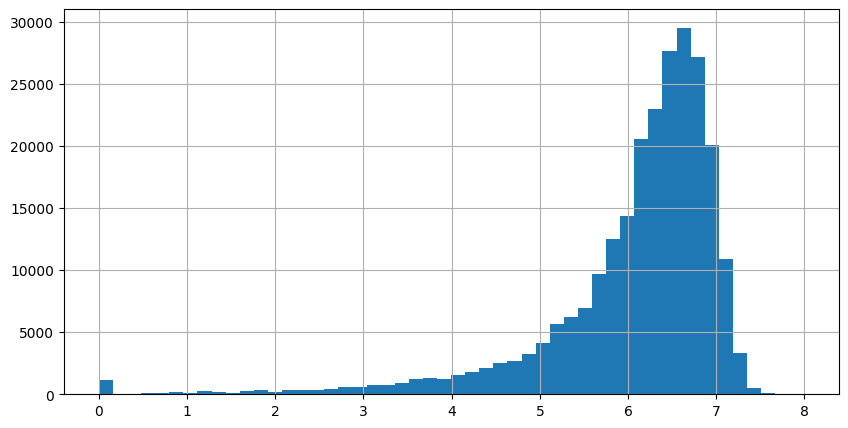

6.357121726312208


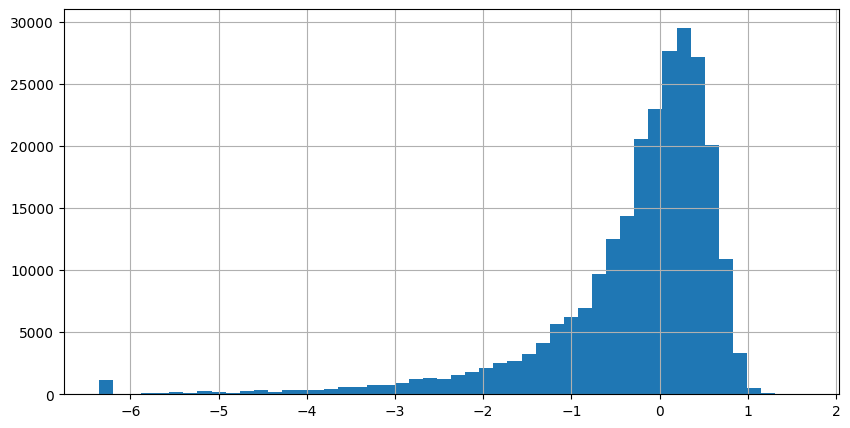

q25 = -0.5589884261173896 
q75 = 0.3523309444945575


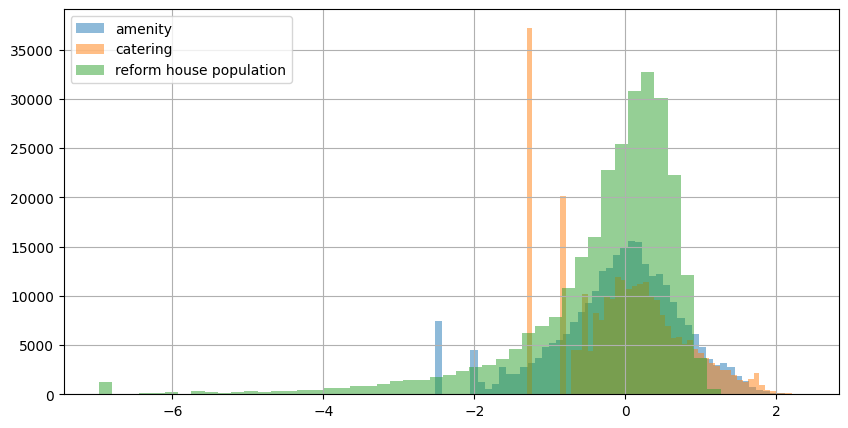

In [201]:
df = df.assign(
  reform_house_population_ln=df.reform_house_population.apply(log1p)
)
df.reform_house_population_ln.hist(bins=50)
plt.show()

median = df.reform_house_population_ln.median()
print(median)
df = df.assign(
  reform_house_population_ln_center=df.reform_house_population_ln.apply(lambda x: x - median)
)
df.reform_house_population_ln_center.hist(bins=50)
plt.show()

q25, q75 = df.reform_house_population_ln_center.quantile(q=0.25), df.reform_house_population_ln_center.quantile(q=0.75)
print("q25 =", q25, "\nq75 =", q75)

median = df.reform_house_population_ln_center.median()
df = df.assign(
  reform_house_population_ln_center_norm=df.reform_house_population_ln_center.apply(lambda x:  (x - median) / (q75 - q25))
)
df.fillna(method='ffill', inplace=True)
df.amenity_ln_center_norm.hist(bins=50, label='amenity', alpha=0.5)
df.catering_ln_center_norm.hist(bins=50, label='catering', alpha=0.5)
df.reform_house_population_ln_center_norm.hist(bins=50, label='reform house population', alpha=0.5)
plt.legend()
plt.show()

reform_mean_floor_count ??

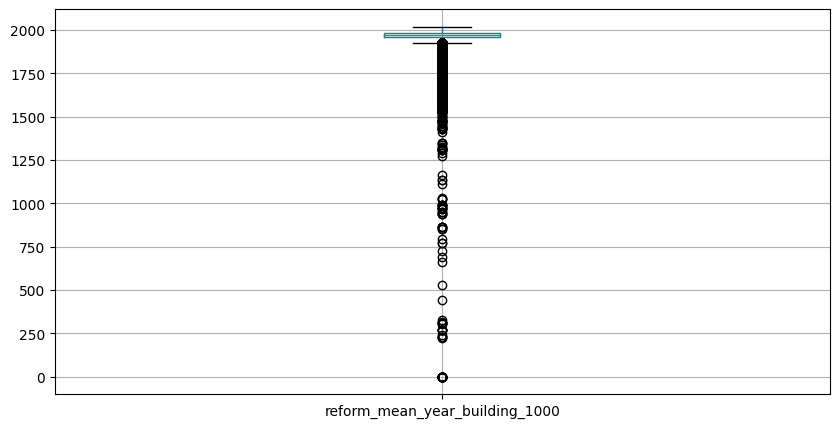

In [202]:
df.boxplot('reform_mean_year_building_1000')
plt.show()

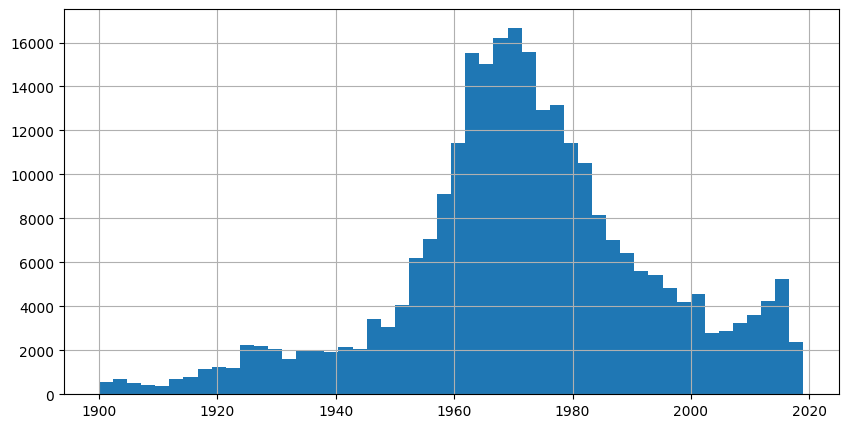

In [203]:
df[df.reform_mean_year_building_1000 > 1900].reform_mean_year_building_1000.hist(bins=50)
plt.show()

71.4356435643565


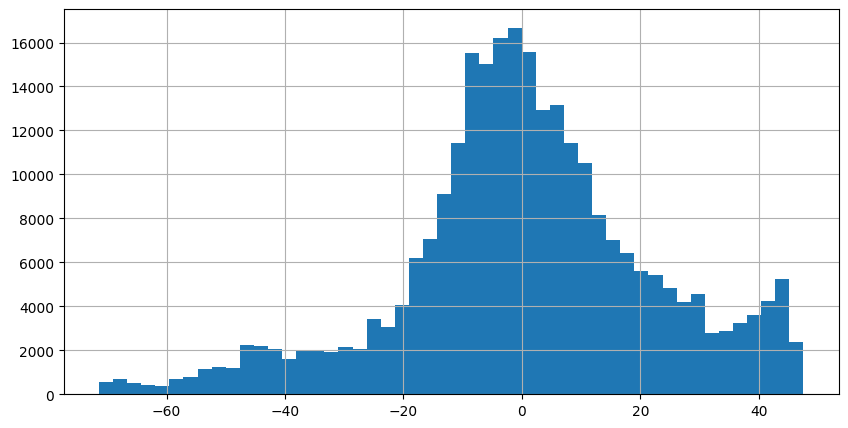

q25 = -10.119854090672561 
q75 = 12.817689768976607


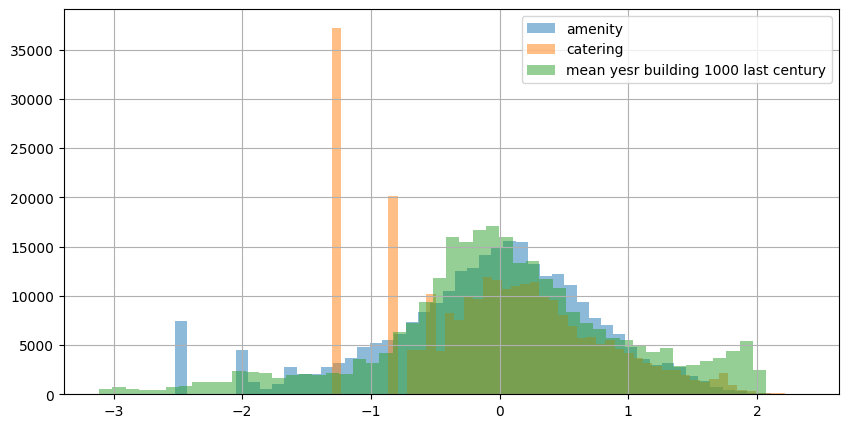

In [204]:
df = df.assign(
  reform_mean_year_building_1000_before_1600=((df.reform_mean_year_building_1000 <= 1600)).astype(int),
  reform_mean_year_building_1000_before_1900=((1600 < df.reform_mean_year_building_1000) & (df.reform_mean_year_building_1000 <= 1900)).astype(int),
  reform_mean_year_building_1000_last_century=0
)
reform_mean_year_building_1000_last_century=df[df.reform_mean_year_building_1000 > 1900].reform_mean_year_building_1000 - 1900

median = reform_mean_year_building_1000_last_century.median()
print(median)
df = df.assign(
  reform_mean_year_building_1000_last_century_center=reform_mean_year_building_1000_last_century.apply(lambda x: x - median)
)
df.reform_mean_year_building_1000_last_century_center.hist(bins=50)
plt.show()

q25, q75 = df.reform_mean_year_building_1000_last_century_center.quantile(q=0.25), df.reform_mean_year_building_1000_last_century_center.quantile(q=0.75)
print("q25 =", q25, "\nq75 =", q75)

median = df.reform_mean_year_building_1000_last_century_center.median()
df = df.assign(
  reform_mean_year_building_1000_last_century_center_norm=df.reform_mean_year_building_1000_last_century_center.apply(lambda x:  (x - median) / (q75 - q25))
)

df.fillna(method='ffill', inplace=True)

df.amenity_ln_center_norm.hist(bins=50, label='amenity', alpha=0.5)
df.catering_ln_center_norm.hist(bins=50, label='catering', alpha=0.5)
df.reform_mean_year_building_1000_last_century_center_norm.hist(bins=50, label='mean yesr building 1000 last century', alpha=0.5)
plt.legend()
plt.show()

region -- nevermind

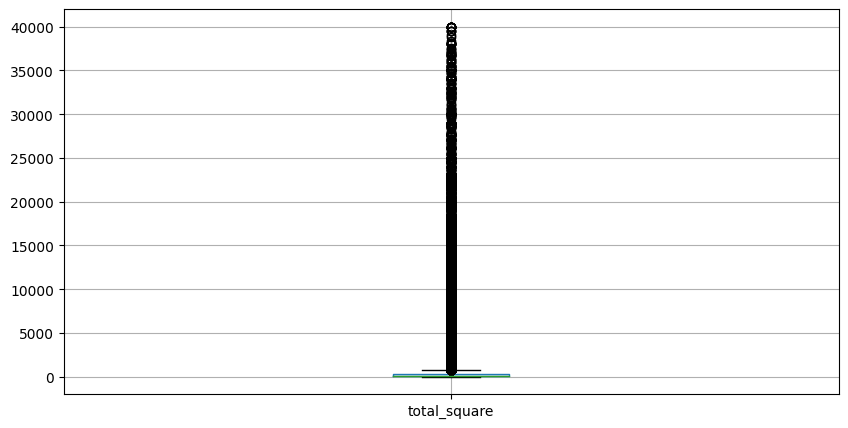

In [205]:
df.boxplot('total_square')
plt.show()

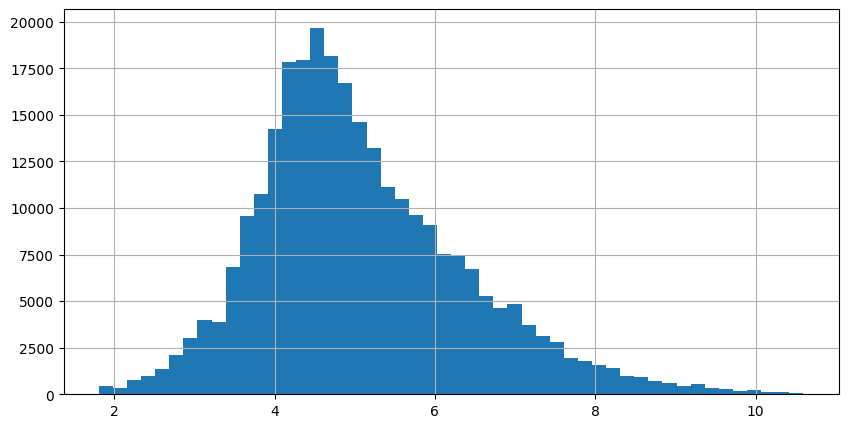

In [206]:
df.total_square.apply(log1p).hist(bins=50)
plt.show()

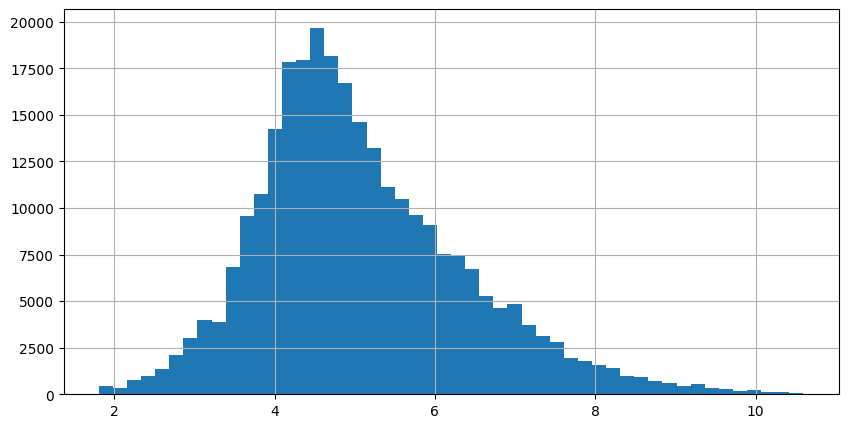

4.859812404361672


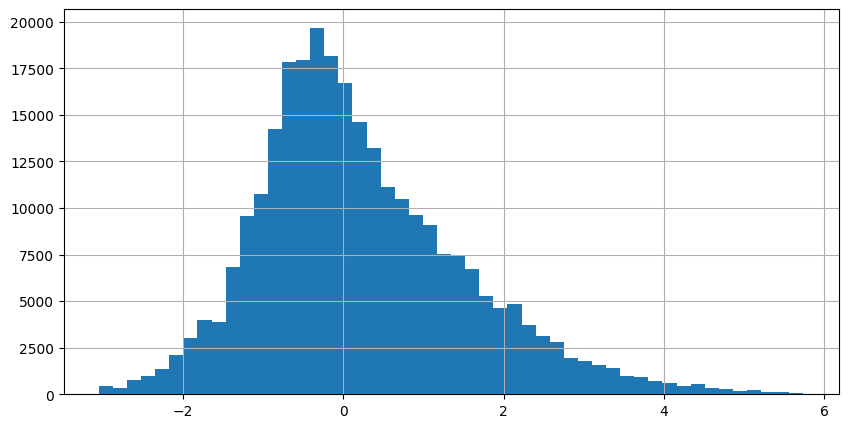

q25 = -0.6686436575040311 
q75 = 0.9602705259906896


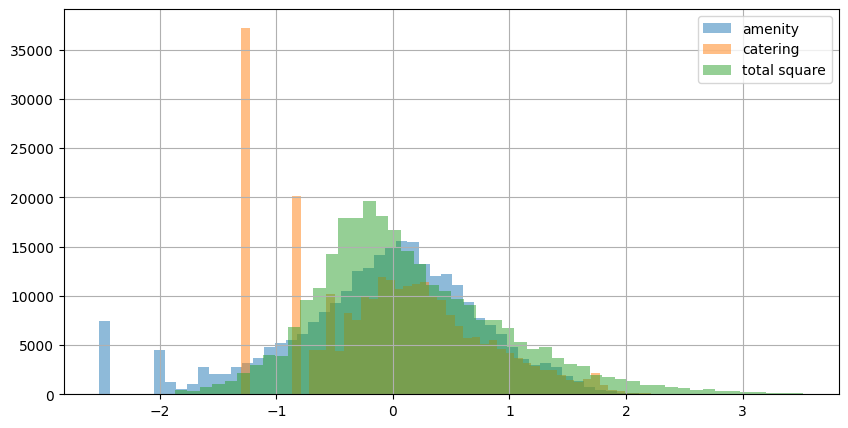

In [207]:
df = df.assign(
  total_square_ln=df.total_square.apply(log1p)
)
df.total_square_ln.hist(bins=50)
plt.show()

median = df.total_square_ln.median()
print(median)
df = df.assign(
  total_square_ln_center=df.total_square_ln.apply(lambda x: x - median)
)
df.total_square_ln_center.hist(bins=50)
plt.show()

q25, q75 = df.total_square_ln_center.quantile(q=0.25), df.total_square_ln_center.quantile(q=0.75)
print("q25 =", q25, "\nq75 =", q75)

median = df.total_square_ln_center.median()
df = df.assign(
  total_square_ln_center_norm=df.total_square_ln_center.apply(lambda x:  (x - median) / (q75 - q25))
)
df.amenity_ln_center_norm.hist(bins=50, label='amenity', alpha=0.5)
df.catering_ln_center_norm.hist(bins=50, label='catering', alpha=0.5)
df.total_square_ln_center_norm.hist(bins=50, label='total square', alpha=0.5)
plt.legend()
plt.show()

street skip

In [208]:
df = df.assign(
  yyyyMM=df.date.apply(lambda date: str(date)[0:7])
)

df.yyyyMM.head(5)

0    2020-02
1    2020-05
2    2020-06
3    2020-07
4    2020-03
Name: yyyyMM, dtype: object

In [209]:
df.to_csv('processed_data/11-test-features.csv', index=False)